# Notebook Description

This notebook is concerned with producing maps of the rainfall trends in the MJO phases (1-8) and the MJO subphases (enhanced, suppressed ect.).
<br>
This is done in the following order:
<ol>
    <li> AWAP and RMM data is loaded in. </li>
    <li> Data from start of year is moved to previous year, making resampling work for individual years.</li>
    <li> Data is split into different MJO phases (1-8). </li>
    <li> Indices (count and sum) are calculated for data. </li>
    <li> Phases are then compbined together to subphases.</li>
    <li> Trends then calculated for subphases.</li>
    
</ol>

# Packages

In [4]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import matplotlib.colors as colors
import warnings
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec

import sys

sys.path.append(os.path.join(os.getcwd(), 'Documents', 'mjo_and_rainfall_trend'))
import constants

from importlib import reload
import calculation_functions
import load_dataset as load
import phase_calc_functions as phase_calc
import miscellaneous
import plotting_functions as pf

In [5]:
image_dir = '/g/data/w40/ab2313/images/mjo_and_rainfall_trend_images/'

# Data

In [6]:
# Loading awap
awap = load.load_awap()
rmm = load.load_rmm()

awap_ws = phase_calc.wet_season_year(awap)
rmm_ws = phase_calc.wet_season_year(rmm)

awap_ws, rmm_ws = calculation_functions.match_dataset_time(awap_ws, rmm_ws)

awap_ws = miscellaneous.apply_masks(awap_ws)

New datasets are now of lenght d1 = 5578 and d2 = 5578


In [7]:
np.unique(rmm_ws.time.dt.year.values, return_counts=True)

(array([1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
        1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
        1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
        2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
        2018, 2019]),
 array([121, 122, 121, 121, 121, 122, 121, 121, 121, 122, 121, 121, 121,
        122, 121, 121, 121, 122, 121, 121, 121, 122, 121, 121, 121, 122,
        121, 121, 121, 122, 121, 121, 121, 122, 121, 121, 121, 122, 121,
        121, 121, 122, 121, 121, 121, 122]))

In [8]:
np.unique(awap_ws.time.dt.year.values, return_counts=True)

(array([1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
        1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
        1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
        2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
        2018, 2019]),
 array([121, 122, 121, 121, 121, 122, 121, 121, 121, 122, 121, 121, 121,
        122, 121, 121, 121, 122, 121, 121, 121, 122, 121, 121, 121, 122,
        121, 121, 121, 122, 121, 121, 121, 122, 121, 121, 121, 122, 121,
        121, 121, 122, 121, 121, 121, 122]))

# Calculation

In [13]:
awap_split_ws = phase_calc.split_into_1to8(awap_ws, rmm_ws)

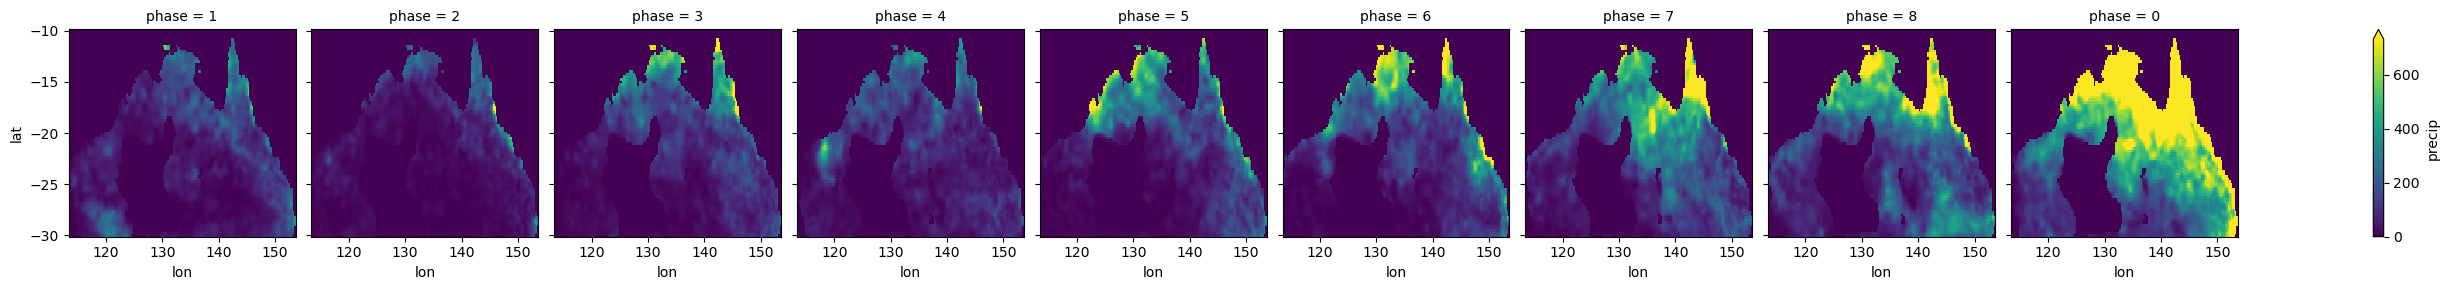

In [24]:
awap_split_ws.precip.isel(time=slice(0, 500)).sum('time').plot(col='phase', robust=True)

In [7]:
awap_sum_phase = calculation_functions.resample_sum(awap_split_ws)
#calculation_functions.monsoon_resample(awap_split_ws, method='sum')
awap_sum_sub = phase_calc.resample_phase_to_subphase(awap_sum_phase)
awap_sum_sub

Enhanced phase definition being used [5, 6]


<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, phase: 4, year: 46)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1974 1975 1976 1977 1978 ... 2015 2016 2017 2018 2019
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, year, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [8]:
awap_count_phase = calculation_functions.resample_count(awap_split_ws)
#calculation_functions.monsoon_resample(awap_split_ws, method='count')
awap_count_sub = phase_calc.resample_phase_to_subphase(awap_count_phase)
awap_count_sub

Enhanced phase definition being used [5, 6]


<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, phase: 4, year: 46)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1974 1975 1976 1977 1978 ... 2015 2016 2017 2018 2019
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, year, lat, lon) int64 0 0 0 0 0 0 0 1 0 ... 0 0 0 0 0 0 0 0

In [9]:
trend_count_sub, trend_sig_count_sub, trend_percent_count_sub, trend_percent_sig_count_sub = \
    phase_calc.return_alltrendinfo_custom(awap_count_sub.precip)

In [10]:
trend_count_sub_norm, trend_sig_count_sub_norm, trend_percent_count_sub_norm, trend_percent_sig_count_sub_norm = \
    phase_calc.return_alltrendinfo_custom(awap_count_sub.precip, normalise = 'subphase')

Enhanced phase definition being used [5, 6]


In [11]:
trend_sum_sub, trend_sig_sum_sub, trend_percent_sum_sub, trend_percent_sig_sum_sub = \
    phase_calc.return_alltrendinfo_custom(awap_sum_sub.precip)

In [12]:
trend_sum_sub_norm, trend_sig_sum_sub_norm, trend_percent_sum_sub_norm, trend_percent_sig_sum_sub_norm = \
    phase_calc.return_alltrendinfo_custom(awap_sum_sub.precip, normalise = 'subphase')

Enhanced phase definition being used [5, 6]


In [13]:
awap_sum_sub_norm = phase_calc.normalise_trend(awap_sum_sub.precip, normalise = 'subphase')
awap_count_sub_norm = phase_calc.normalise_trend(awap_count_sub.precip, normalise = 'subphase')

awap_sum_sub_norm = awap_sum_sub_norm.to_dataset(name = 'precip')
awap_count_sub_norm = awap_count_sub_norm.to_dataset(name = 'precip')
awap_sum_sub_norm

Enhanced phase definition being used [5, 6]
Enhanced phase definition being used [5, 6]


<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, year: 46, phase: 4)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1974 1975 1976 1977 1978 ... 2015 2016 2017 2018 2019
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, year, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [14]:
awap_int_sub = awap_sum_sub/awap_count_sub
awap_int_sub

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, year: 46, phase: 4)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1974 1975 1976 1977 1978 ... 2015 2016 2017 2018 2019
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, year, lat, lon) float64 nan nan nan nan ... nan nan nan nan

In [15]:
trend_int_sub, trend_sig_int_sub, trend_percent_int_sub, trend_percent_sig_int_sub = \
    phase_calc.return_alltrendinfo_custom(awap_int_sub.precip)

In [16]:
merged_count_sum_norm_raw =\
        xr.merge([trend_count_sub_norm.to_dataset(name='count'), 
                  trend_sum_sub_norm.to_dataset(name='sum')])

merged_count_sum_norm =\
        xr.merge([trend_percent_count_sub_norm.to_dataset(name='count'), 
                  trend_percent_sum_sub_norm.to_dataset(name='sum')])

stip_count_sum_norm  = xr.merge([trend_percent_sig_count_sub_norm.to_dataset(name='count'),
          trend_percent_sig_sum_sub_norm.to_dataset(name='sum')])

In [17]:
# Merging data together
merged_count_sum_raw =\
        xr.merge([trend_count_sub.to_dataset(name='count'), 
                  trend_sum_sub.to_dataset(name='sum')])

merged_count_sum =\
        xr.merge([trend_percent_count_sub.to_dataset(name='count'), 
                  trend_percent_sum_sub.to_dataset(name='sum')])

stip_count_sum = xr.merge([trend_percent_sig_count_sub.to_dataset(name='count'),
          trend_percent_sig_sum_sub.to_dataset(name='sum')])



In [18]:
merged_count_sum

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, phase: 4)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    count    (phase, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    sum      (phase, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

# Plots

## Maps

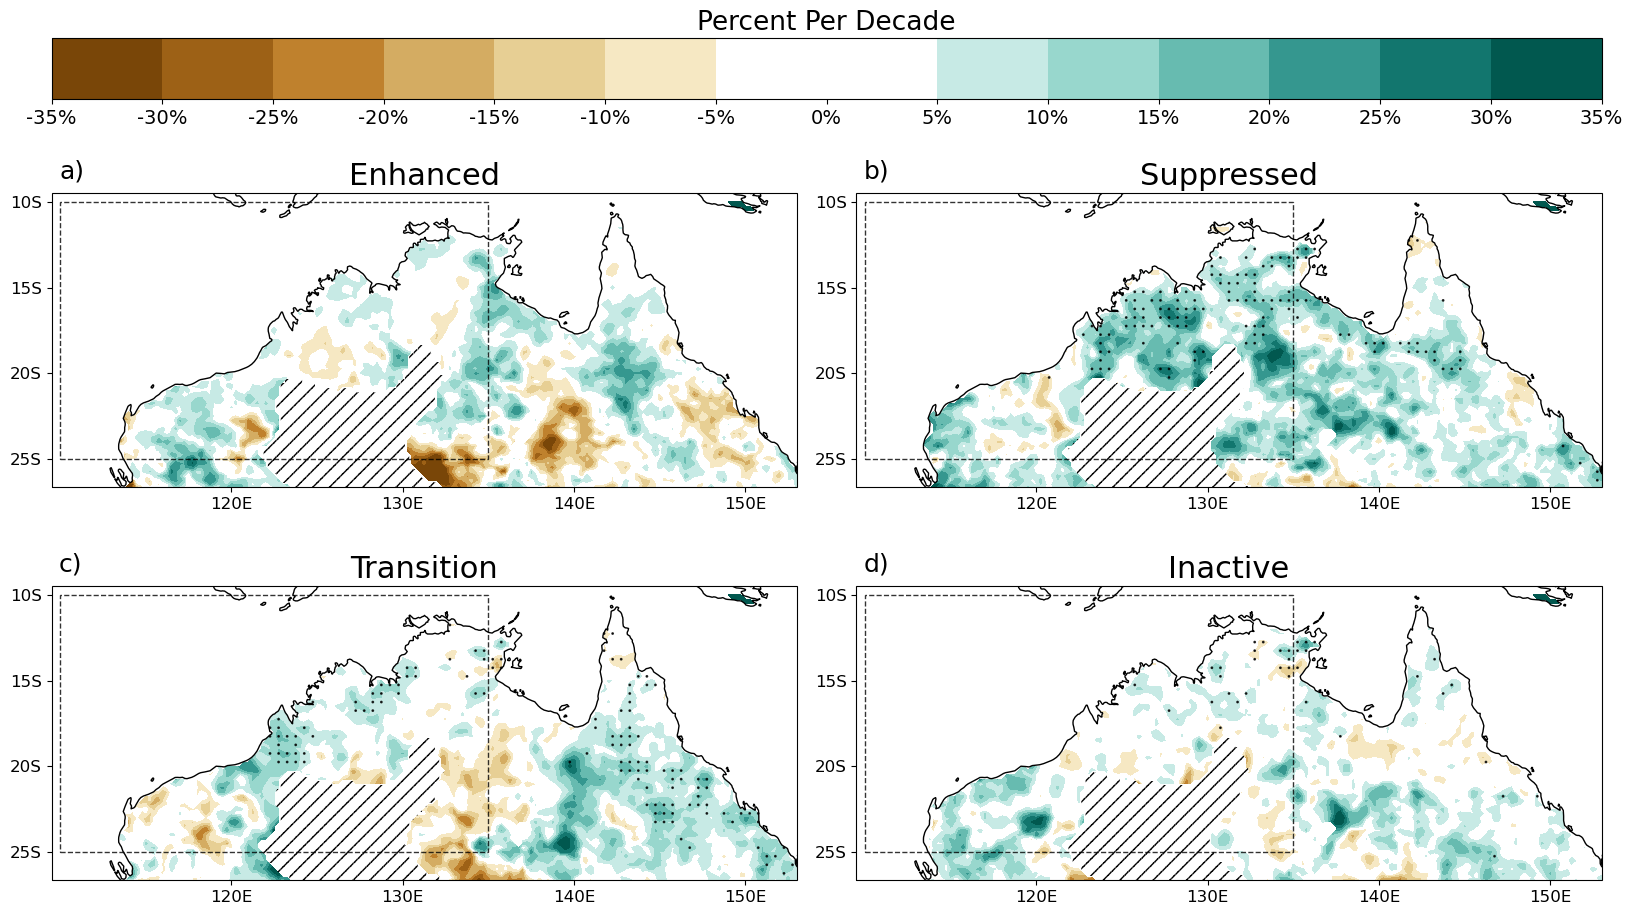

In [126]:
fig = pf.all_phase_trend_plots(trend_percent_int_sub, stip_data=trend_percent_sig_int_sub,
                              vmax=35, step=5, colorbar_title='Percent Per Decade')
fig.savefig(
    os.path.join(constants.IMAGE_SAVE_DIR, '02_supplementary_all_phase_intensity_trends.png'),
           dpi=500, bbox_inches='tight')

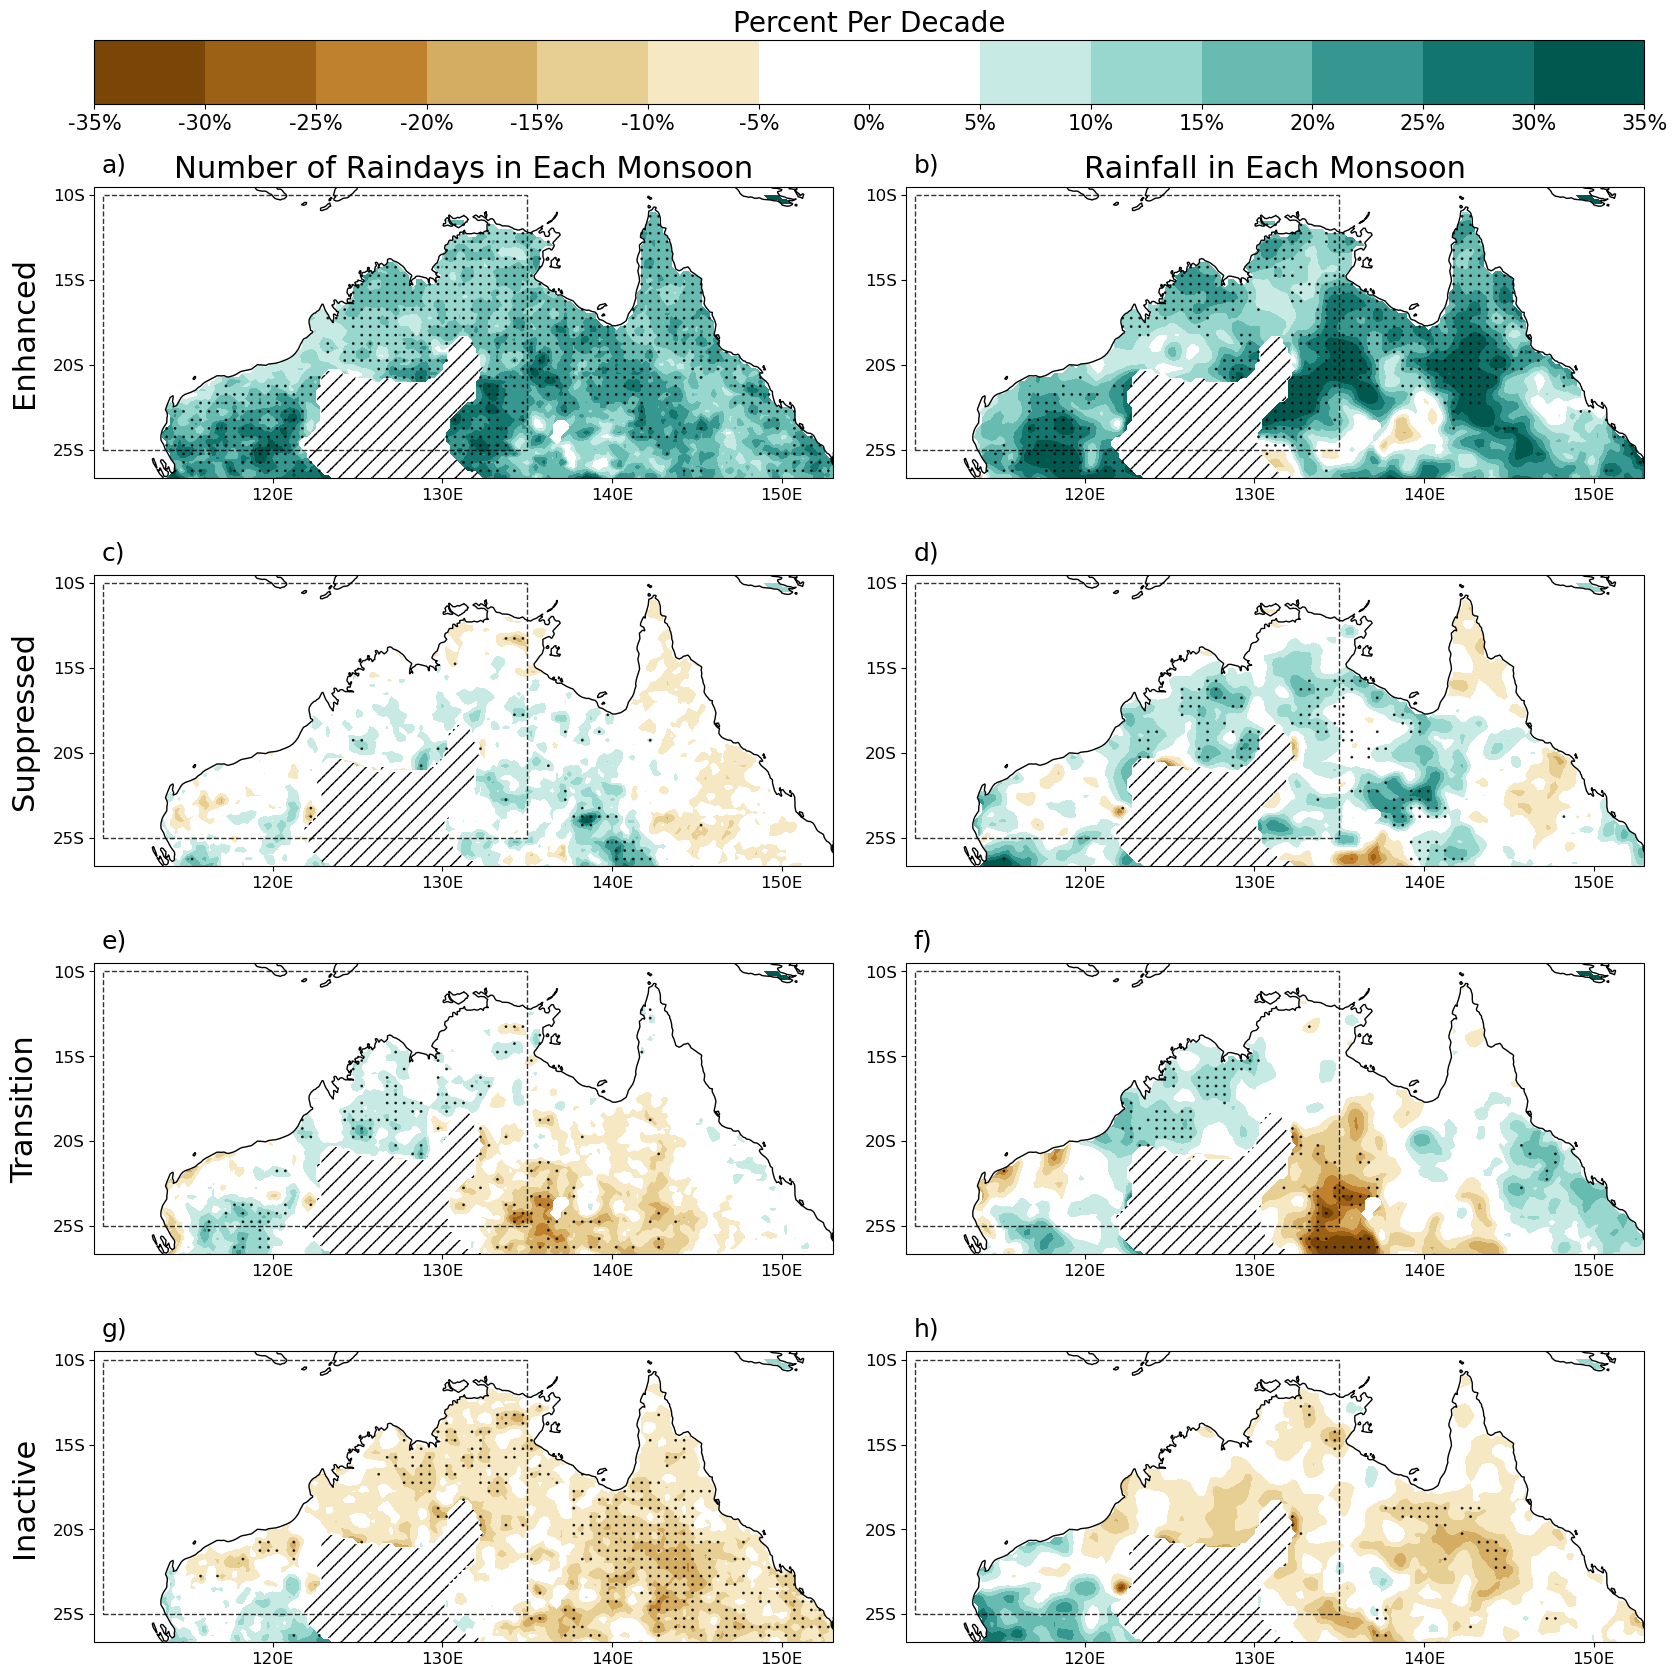

In [127]:
col_titles = ['Number of Raindays in Each Monsoon', 'Rainfall in Each Monsoon']
reload(pf)
fig = pf.datavars_as_col_plot(merged_count_sum, 'phase', stip_data=stip_count_sum, vmax=35, step=5,
                       colorbar_title = 'Percent Per Decade', col_titles=col_titles)

fig.savefig(
    os.path.join(constants.IMAGE_SAVE_DIR, '02_supplementary_all_phase_count_and_sum_trends.png'),
           dpi=500, bbox_inches='tight')

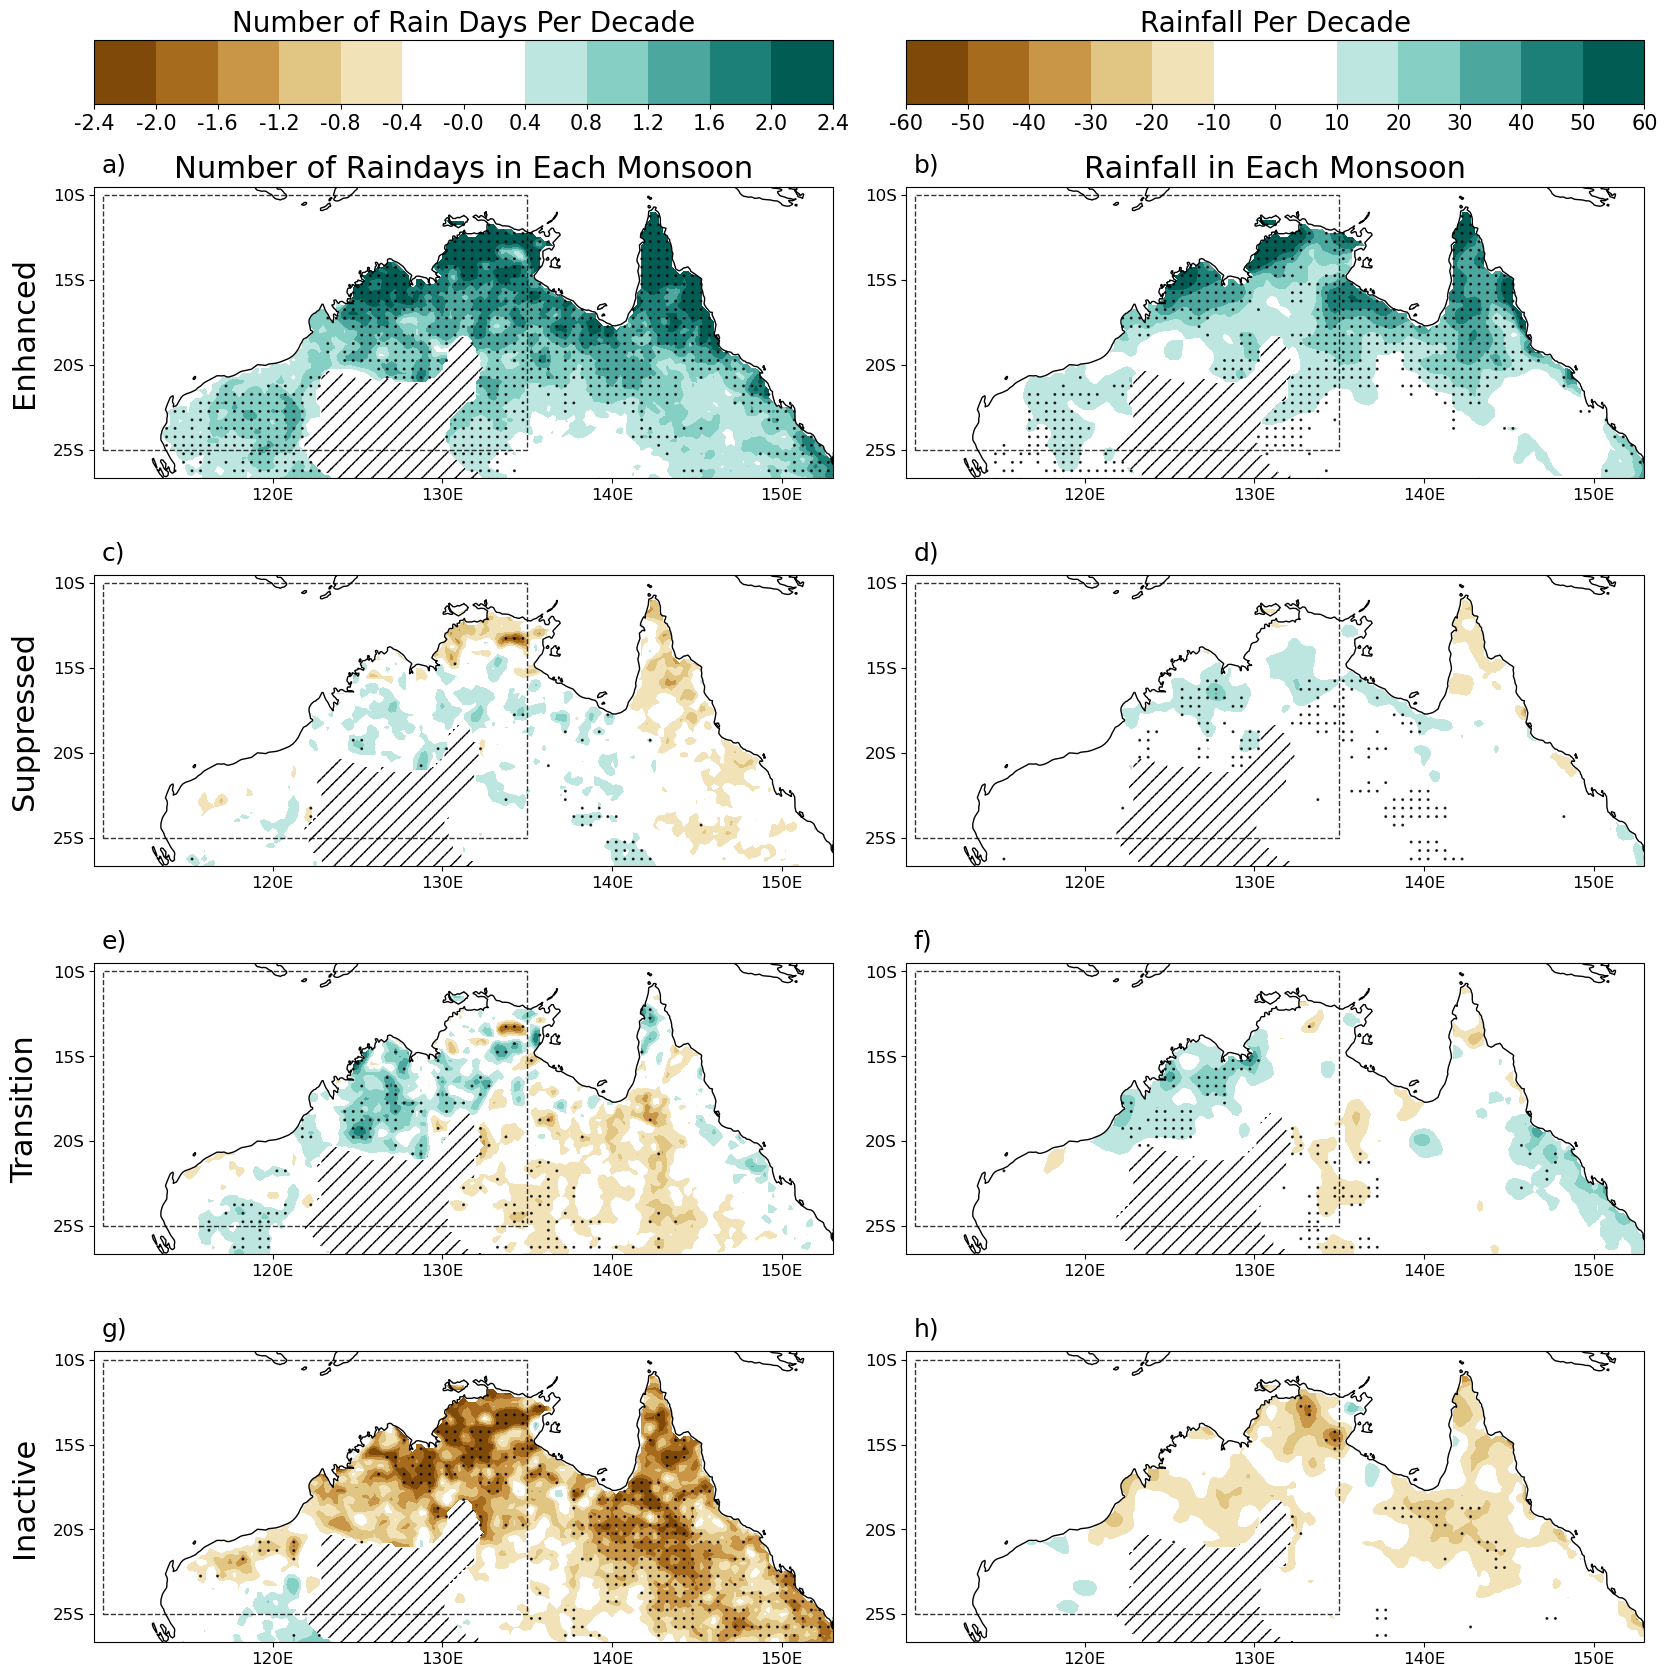

In [128]:
col_titles = ['Number of Raindays in Each Monsoon', 'Rainfall in Each Monsoon']

fig = pf.datavars_as_col_plot(merged_count_sum_raw * 10, 'phase', stip_data=stip_count_sum, 
                              vmax = 2.4, step = 0.4, round_level=1, vmax2=60, step2=10,
                              sig_size=constants.sig_size+.2,
                              colorbar_title = 'Number of Rain Days Per Decade', 
                              colorbar_title2 = 'Rainfall Per Decade',
                              col_titles=col_titles, tick_symbol=None)
fig.savefig(
    os.path.join(constants.IMAGE_SAVE_DIR, '02_supplementary_all_phase_count_and_sum_trends_raw.png'),
           dpi=500, bbox_inches='tight')

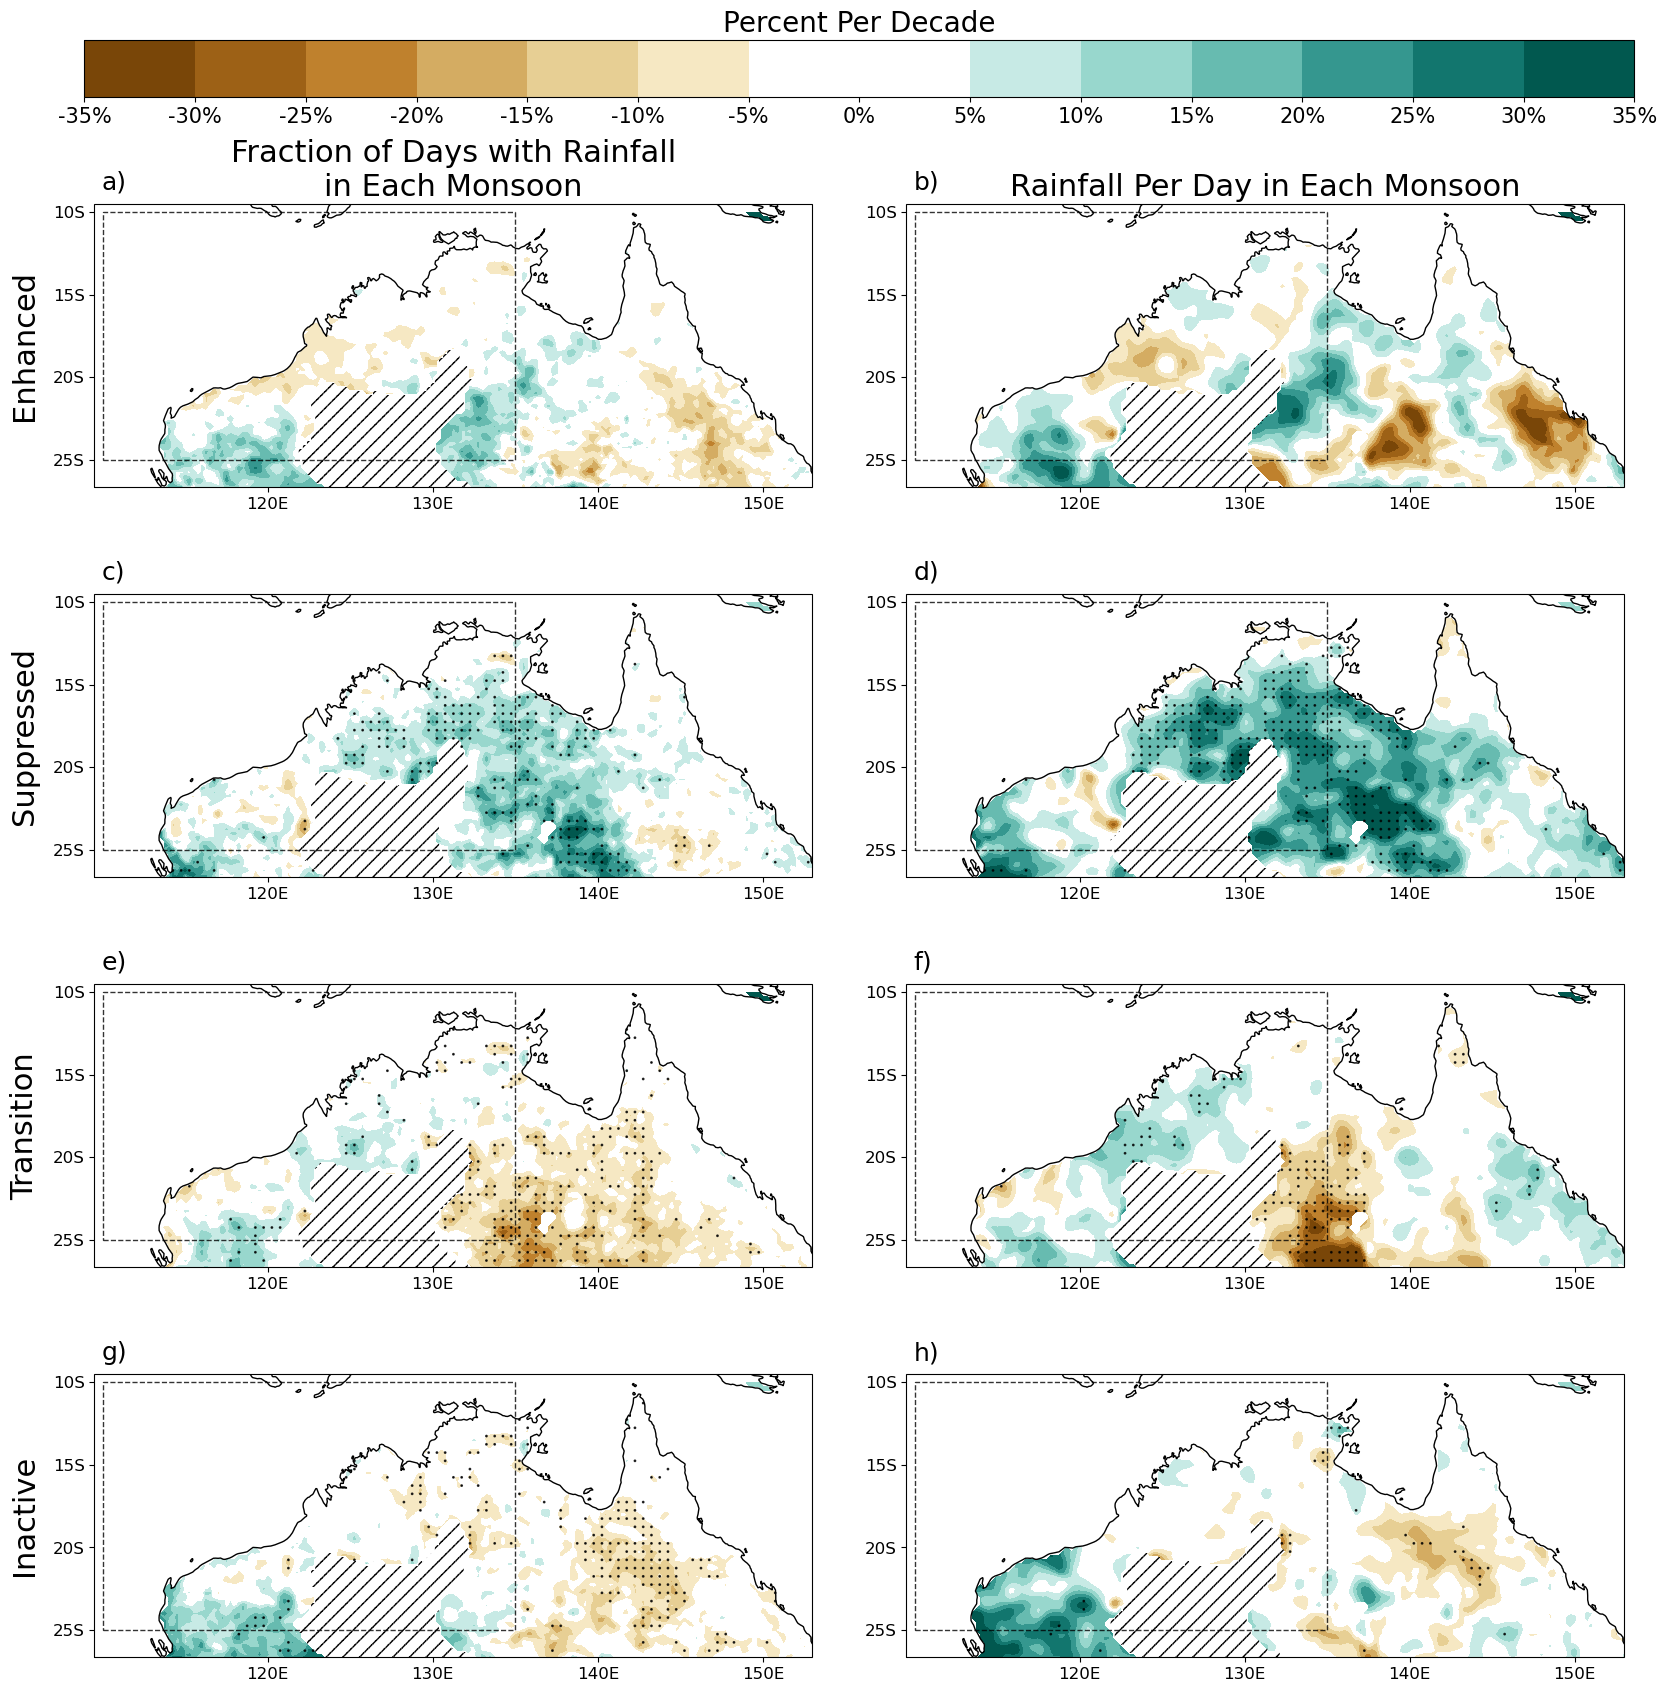

In [124]:
col_titles_norm = ['Fraction of Days with Rainfall\nin Each Monsoon', 'Rainfall Per Day in Each Monsoon']

fig = pf.datavars_as_col_plot(
    merged_count_sum_norm, 'phase', stip_data=stip_count_sum_norm, vmax= 35, step=5, hspace=0.45,
                              colorbar_title='Percent Per Decade', col_titles=col_titles_norm)

fig.savefig(
    os.path.join(constants.IMAGE_SAVE_DIR, '02_supplementary_all_phase_count_and_sum_normalise_trends.png'),
           dpi=500, bbox_inches='tight')

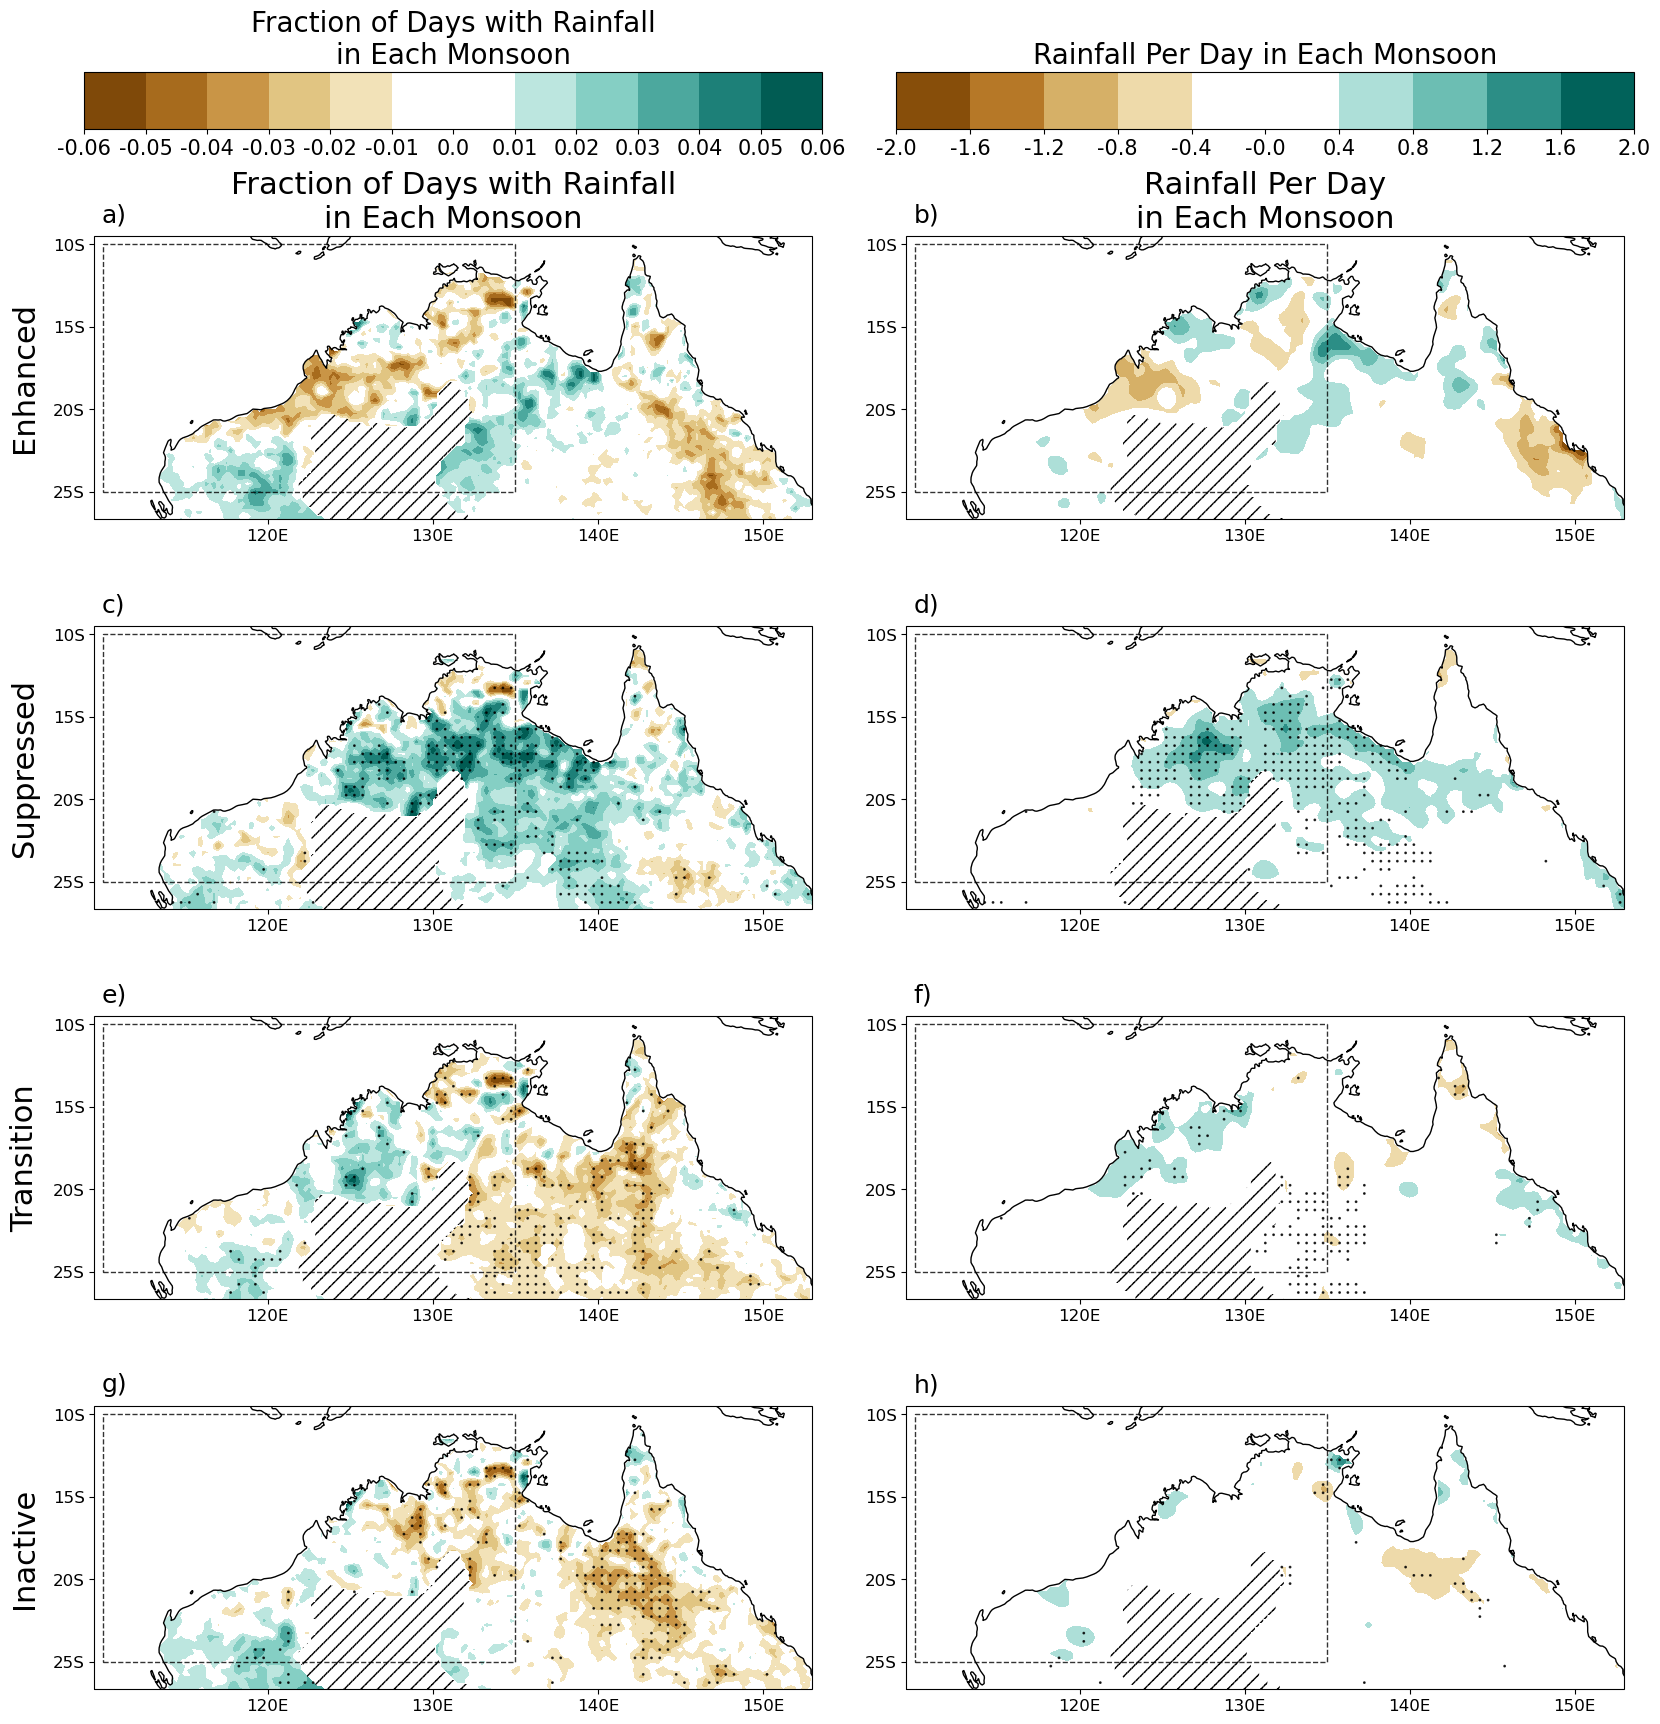

In [125]:
col_titles_norm = ['Fraction of Days with Rainfall\nin Each Monsoon', 'Rainfall Per Day\nin Each Monsoon']

fig = pf.datavars_as_col_plot(merged_count_sum_norm_raw * 10, 'phase', stip_data=stip_count_sum_norm, 
                              vmax = .06, step = .01, round_level=2, vmax2=2, step2=.4, hspace=0.45,
                              colorbar_title = 'Fraction of Days with Rainfall\nin Each Monsoon',
                              colorbar_title2 = 'Rainfall Per Day in Each Monsoon',
                              col_titles=col_titles_norm, tick_symbol=None)

fig.savefig(
    os.path.join(constants.IMAGE_SAVE_DIR, '02_supplementary_all_phase_count_and_sum_trends_norm_raw.png'),
           dpi=500, bbox_inches='tight')

## PDF's

In [129]:
def plot_hist(ax, data, phase, xmax = 700, start=5, step = 1, title = '', xlabel = '', zorder = [0, 1],
             legend_on=True, add_ratio_plot=False):
    
    # Subsetting data.
    dist1 = data.isel(year = slice(None,23)).sel(
        phase = phase,lon = slice(110, 135), lat = slice(-25,-10)).precip.values.flatten()
    dist2 = data.isel(year = slice(23,None)).sel(
        phase = phase,lon = slice(110, 135), lat = slice(-25,-10)).precip.values.flatten()
    # Bins
    bins = np.arange(start, xmax, step)
    # First data slice
    hist_data1 = ax.hist(dist1, bins = bins, color = constants.brown,
            alpha = 0.7, zorder = zorder[0], label = '1974/75 to 1996/97');
    # Second data slice
    hist_data2 = ax.hist(dist2, bins = bins, 
             color = constants. green, alpha = 0.6,zorder = zorder[1], label = '1997/98 to 2019/20');
    
    if legend_on:
        leg = ax.legend(fontsize=constants.cbar_title_size)
    ax.set_xlim(start,xmax)
    pf.format_axis(ax)
    ax.set_ylabel('Frequency', size = constants.cbar_title_size);
    ax.set_xlabel(xlabel, size = constants.cbar_title_size)
    ax.set_title(title, size = constants.title_size);
    
    if add_ratio_plot:
        ax2 = ax.twinx()
        plot_ratio = hist_data2[0]/hist_data1[0]
        ax2.plot(hist_data1[1][:-1], plot_ratio, label='Ratio ()', color='darkred')
        ax2.axhline([1], linestyle='--', c='k', alpha=.7)
        ax2.set_ylim([0, np.nanmax(plot_ratio[plot_ratio!=np.inf])*0.9])

    return hist_data1, hist_data2

In [140]:
def create_map_and_distribution_plot(map_ds, map_stip_ds, count_ds, sum_ds, dist1_params, dist2_params,
                                    vmax=35, step=5, phase='enhanced', title1='', title2=''
                                     ):
    
    vmin = -vmax
    cmap = 'BrBG'
    
    fig, gs = pf.fig_formatter(height_ratios = [1,.8,1,.8], width_ratios = [1, .05], 
                               hspace = 0.4, wspace = 0.1)
    
    levels = pf.create_levels(vmax, vmin, step)
    cmap = pf.create_discrete_cmap(cmap, levels=levels, **pf.BASE_CMAP_KWARGS)
    # cmap, levels = pf.colorbar_creater(vmax, step, cmap = cmapi,vmin = vmin, add_white = 1,extender = 1)

    ### Top map
    ax = fig.add_subplot(gs[0,0], projection = ccrs.PlateCarree())

    plot = pf.nwa_map_plot(map_ds.sel(phase = phase)['count'], ax,
                              cmap, levels, stip_data = map_stip_ds.sel(phase = phase)['count'])
    ax.set_title(title1, size = constants.title_size);
    pf.add_figure_label(ax, 'a)')

    cax = plt.subplot(gs[0,1])
    ticks = np.core.defchararray.add(levels.astype(str)  , np.tile('%',len(levels)))
    pf.create_colorbar(plot, cax, levels,  ticks=ticks[::2] ,cbar_title= "Trend\n(Percent Per Decade)",
                       xtickSize=constants.ticklabel_size, cbar_titleSize=constants.cbar_title_size,
                       orientation='vertical', rotation=0, labelpad=3, cut_ticks = 2, title_rotation=90)

    ###### Second map
    ax = fig.add_subplot(gs[2,0], projection = ccrs.PlateCarree())
    plot = pf.nwa_map_plot(map_ds.sel(phase = phase)['sum'], ax,
                  cmap, levels, stip_data = map_stip_ds.sel(phase = phase)['sum'])

    ax.set_title(title2, size = constants.title_size);
    pf.add_figure_label(ax, 'c)')

    cax = plt.subplot(gs[2,1])
    ticks = np.core.defchararray.add(levels.astype(str) , np.tile('%',len(levels)))
    pf.create_colorbar(plot, cax, levels, ticks=ticks[::2] ,cbar_title =  "Trend\n(Percent Per Decade)",
                       xtickSize=constants.ticklabel_size, cbar_titleSize=constants.cbar_title_size, 
                       orientation='vertical', rotation=0,  labelpad=3, cut_ticks=2, title_rotation=90)

    #### Adding in PDF's

    ax2 = fig.add_subplot(gs[1,0])
    count_dat1, count_dat2 = plot_hist(ax2,count_ds, phase, **dist1_params, title = '')
    pf.add_figure_label(ax2, 'b)')
    ax2.tick_params(axis='x', labelsize=constants.ticklabel_size)
    ax2.tick_params(axis='y', labelsize=constants.ticklabel_size)

    ax1 = fig.add_subplot(gs[3,0])
    sum_dat1, sum_dat2 = plot_hist(ax1,sum_ds, phase, **dist2_params, title = '')
    pf.add_figure_label(ax1, 'd)')
    ax1.tick_params(axis='x', labelsize=constants.ticklabel_size)
    ax1.tick_params(axis='y', labelsize=constants.ticklabel_size)
    
    return fig

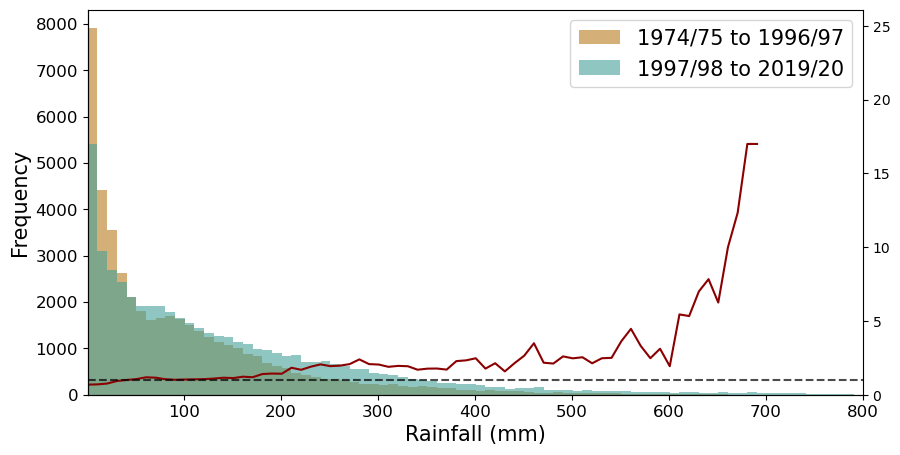

In [132]:
fig, gs = pf.fig_formatter(width_ratios=[1], height_ratios=[1])
ax = fig.add_subplot(111)
sum_hist_dat1, sum_hist_dat2 = plot_hist(ax, awap_sum_sub, 'enhanced', xlabel = 'Rainfall (mm)',
             legend_on=True, xmax = 800, step = 10, start=1, 
                                        add_ratio_plot=True)

In [133]:
dist_params = {
    'rainfall_count': dict(xmax=70, step=1, 
                           xlabel='Number of Rain Days in Each Monsoon'),
    'rainfall_sum': dict(xmax=800, step=10, 
                         xlabel='Rainfall in Each Monsoon (mm)'),
    'rainfall_frac': dict(start=0.001, xmax = 1, step = .05,
                          xlabel ='Fraction of Days with Rainfall in Each Monsoon'),
    'rainfall_per_day': dict(xmax = 40, step = 0.5, start=0.001,
                             xlabel =  'Rainfall Per Day in Each Monsoon (mm/day)')
}

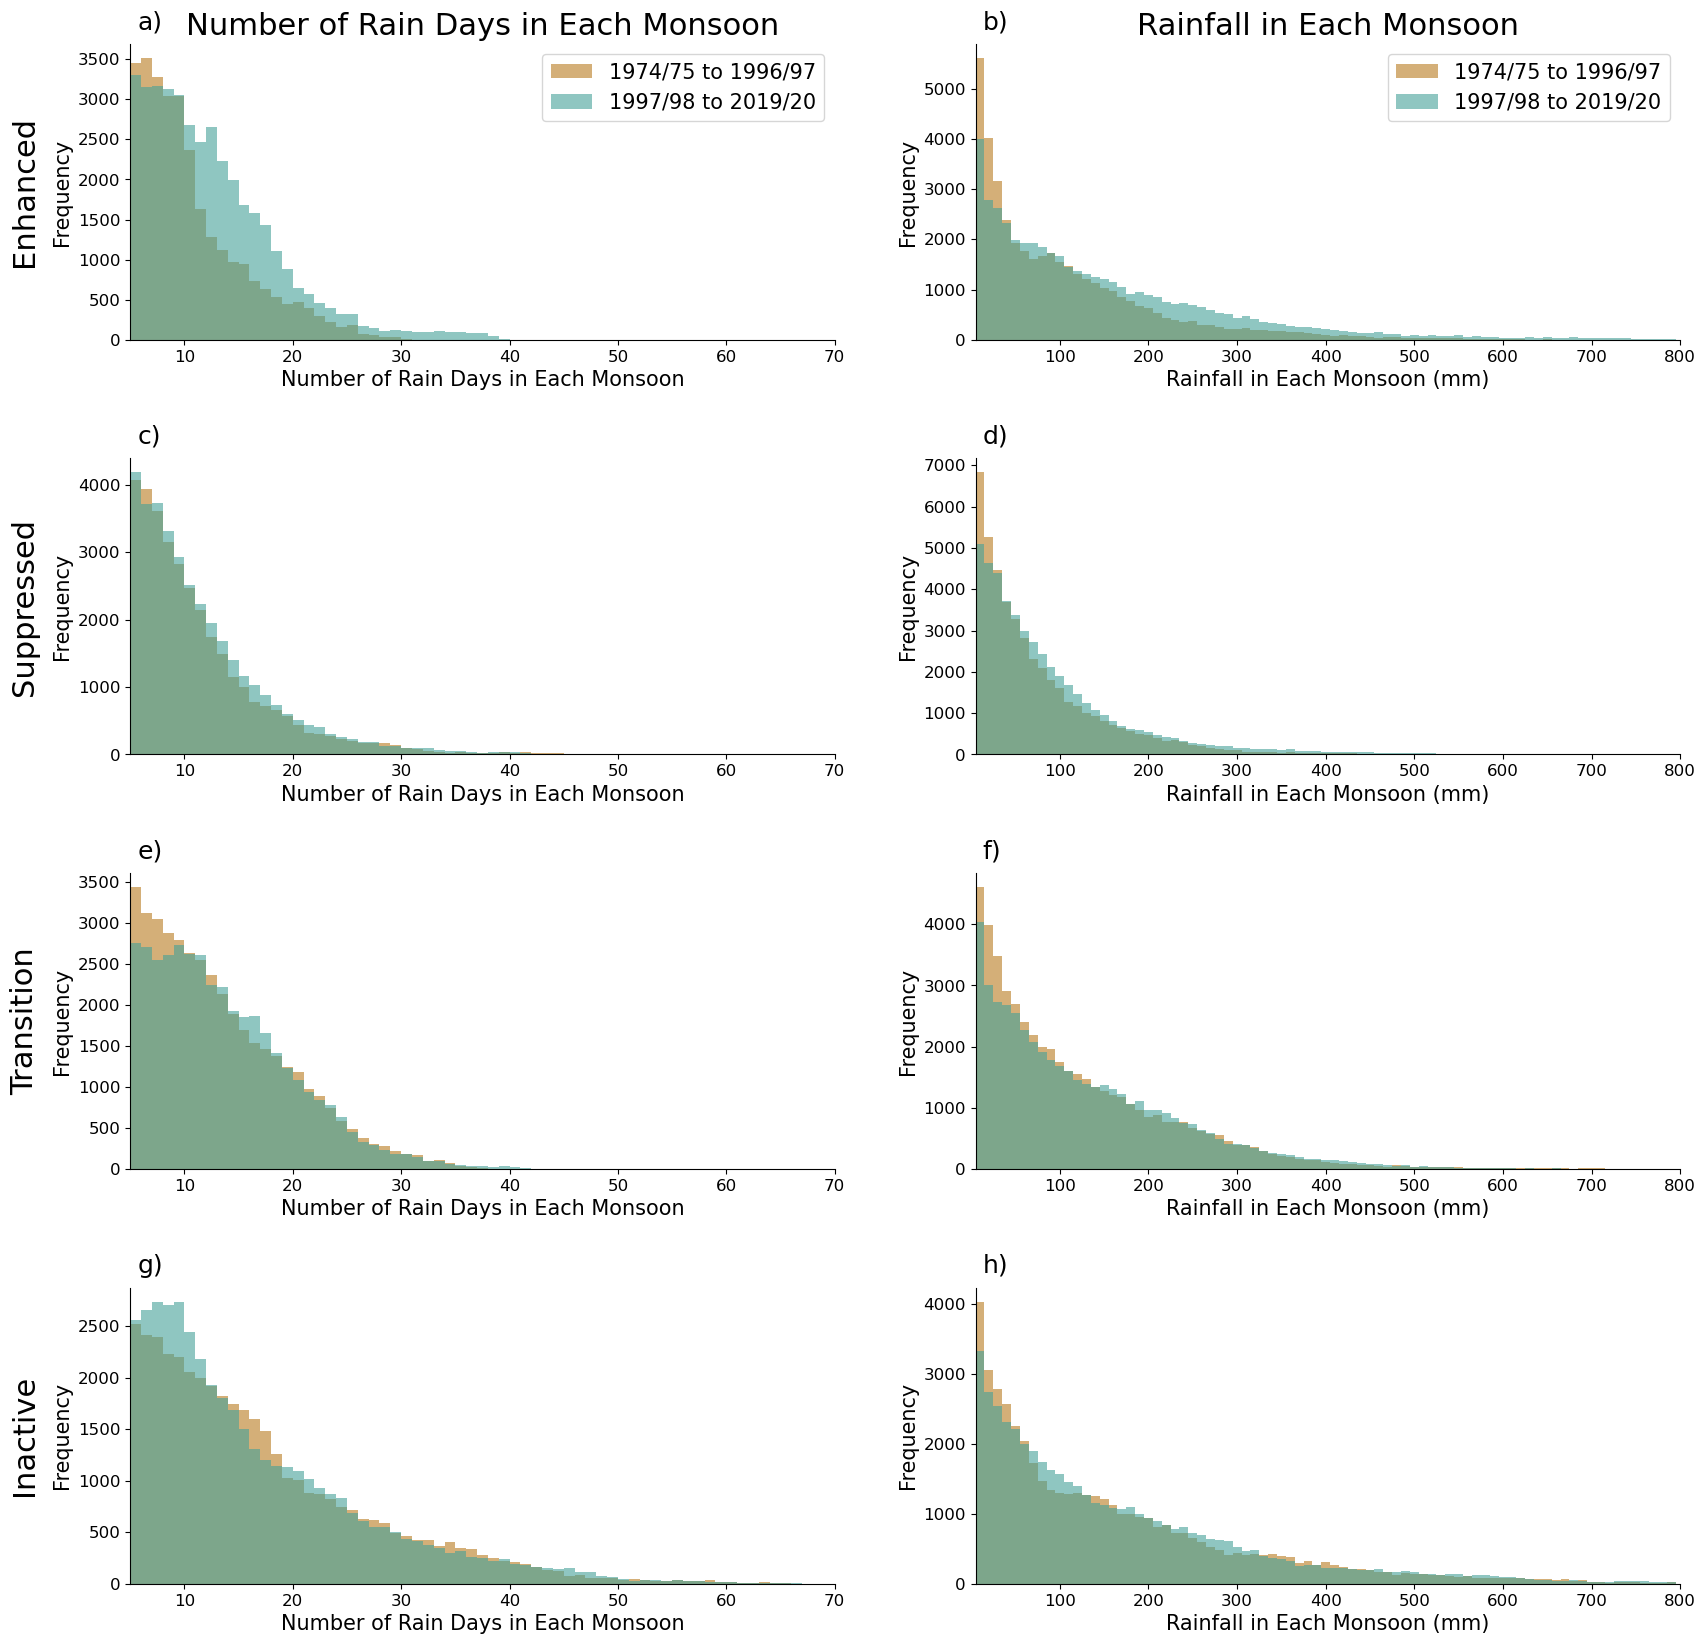

In [134]:
fig, gs = pf.fig_formatter(width_ratios=[1,1], height_ratios=[1]*4)

phases = awap_count_sub.phase.values


for plot_num, phase in enumerate(phases):
    
    legend_on = True if not plot_num else False
    ax1 = fig.add_subplot(gs[plot_num, 0])
    plot_hist(ax1, awap_count_sub, phase, **dist_params['rainfall_count'],
             legend_on=legend_on)
    
    ax2 = fig.add_subplot(gs[plot_num, 1])
    plot_hist(ax2, awap_sum_sub, phase, **dist_params['rainfall_sum'],
             legend_on=legend_on)
    
    if plot_num == 0:
        ax1.set_title('Number of Rain Days in Each Monsoon', fontsize=constants.title_size)
        ax2.set_title('Rainfall in Each Monsoon', fontsize=constants.title_size)
        
    ax1.annotate(phase.capitalize(), xy=(-0.15, 0.5), ha='center', va='center', xycoords = 'axes fraction',
                clip_on=False, rotation=90, fontsize=constants.title_size, zorder=200)
    pf.add_figure_label(ax1, f'{chr(97+plot_num*2)})')
    pf.add_figure_label(ax2, f'{chr(97+plot_num*2+1)})')

    
# fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR, '02_distributions.png'), dpi=600, bbox_inches='tight')

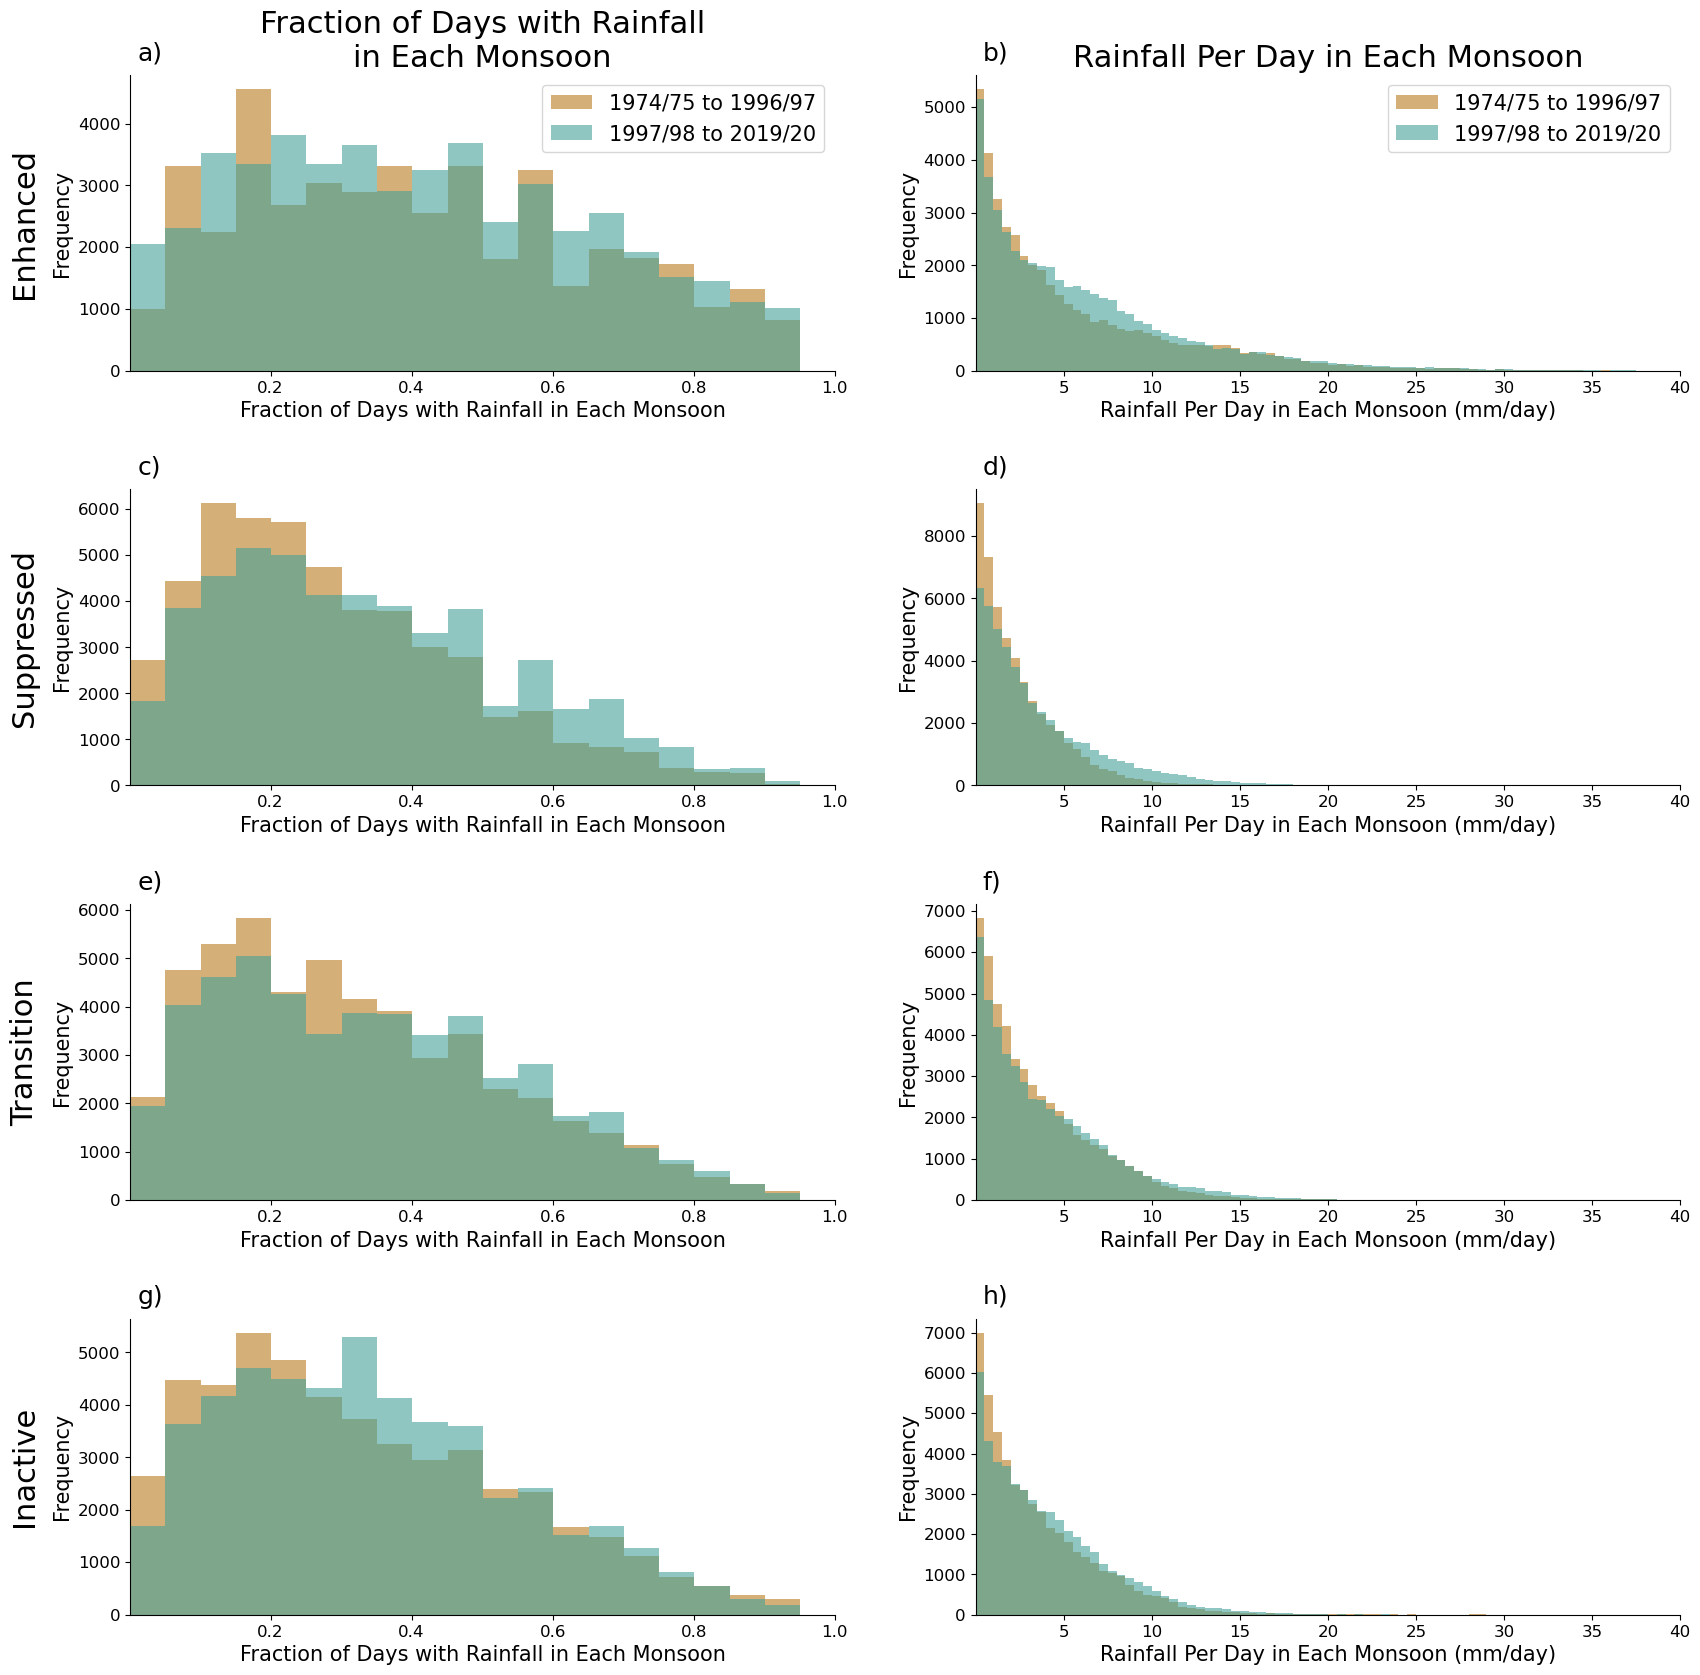

In [135]:
fig, gs = pf.fig_formatter(width_ratios=[1,1], height_ratios=[1]*4)

phases = awap_count_sub_norm.phase.values

for plot_num, phase in enumerate(phases):
    
    legend_on = True if not plot_num else False
    ax1 = fig.add_subplot(gs[plot_num, 0])
    plot_hist(ax1, awap_count_sub_norm, phase, **dist_params['rainfall_frac'], legend_on=legend_on)
    
    ax2 = fig.add_subplot(gs[plot_num, 1])
    plot_hist(ax2, awap_sum_sub_norm, phase, **dist_params['rainfall_per_day'],legend_on=legend_on)
    
    if plot_num == 0:
        ax1.set_title('Fraction of Days with Rainfall\nin Each Monsoon', fontsize=constants.title_size)
        ax2.set_title('Rainfall Per Day in Each Monsoon', fontsize=constants.title_size)
        
    ax1.annotate(phase.capitalize(), xy=(-0.15, 0.5), ha='center', va='center', xycoords = 'axes fraction',
                clip_on=False, rotation=90, fontsize=constants.title_size, zorder=200)
    
    pf.add_figure_label(ax1, f'{chr(97+plot_num*2)})')
    pf.add_figure_label(ax2, f'{chr(97+plot_num*2+1)})')
    
# fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR, '02_distributions_normalised.png'),
#            dpi=600, bbox_inches='tight')

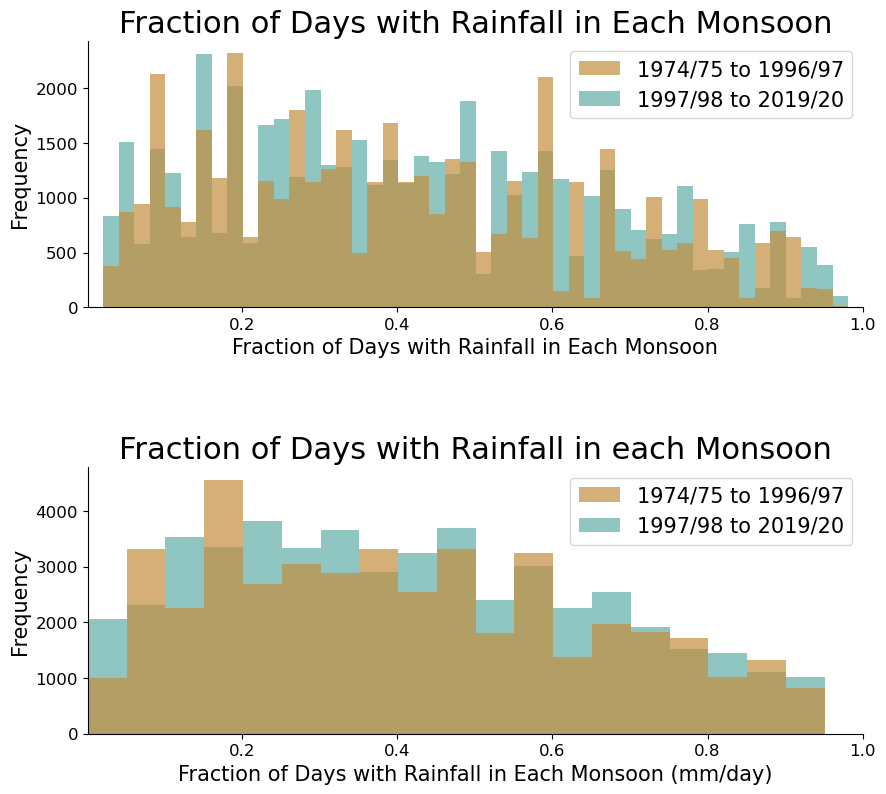

In [136]:
fig = plt.figure(figsize = (10,9))
gs = gridspec.GridSpec(2,1, hspace = 0.6)
phase = 'enhanced'

ax1 = fig.add_subplot(gs[0])
plot_hist(ax1, awap_count_sub_norm, phase, start=0.001, xmax = 1, step = .02,
          title ='Fraction of Days with Rainfall in Each Monsoon', 
                                   xlabel ='Fraction of Days with Rainfall in Each Monsoon',
          zorder = [1,0])

ax2 = fig.add_subplot(gs[1])
plot_hist(ax2, awap_count_sub_norm, phase, start=0.001, xmax = 1, step = .05,
          title ='Fraction of Days with Rainfall in each Monsoon', 
                                   xlabel ='Fraction of Days with Rainfall in Each Monsoon (mm/day)', 
          zorder = [1,0]);

# fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR, '02_distribution_step_frac_test.png'),
#            dpi=600, bbox_inches='tight')

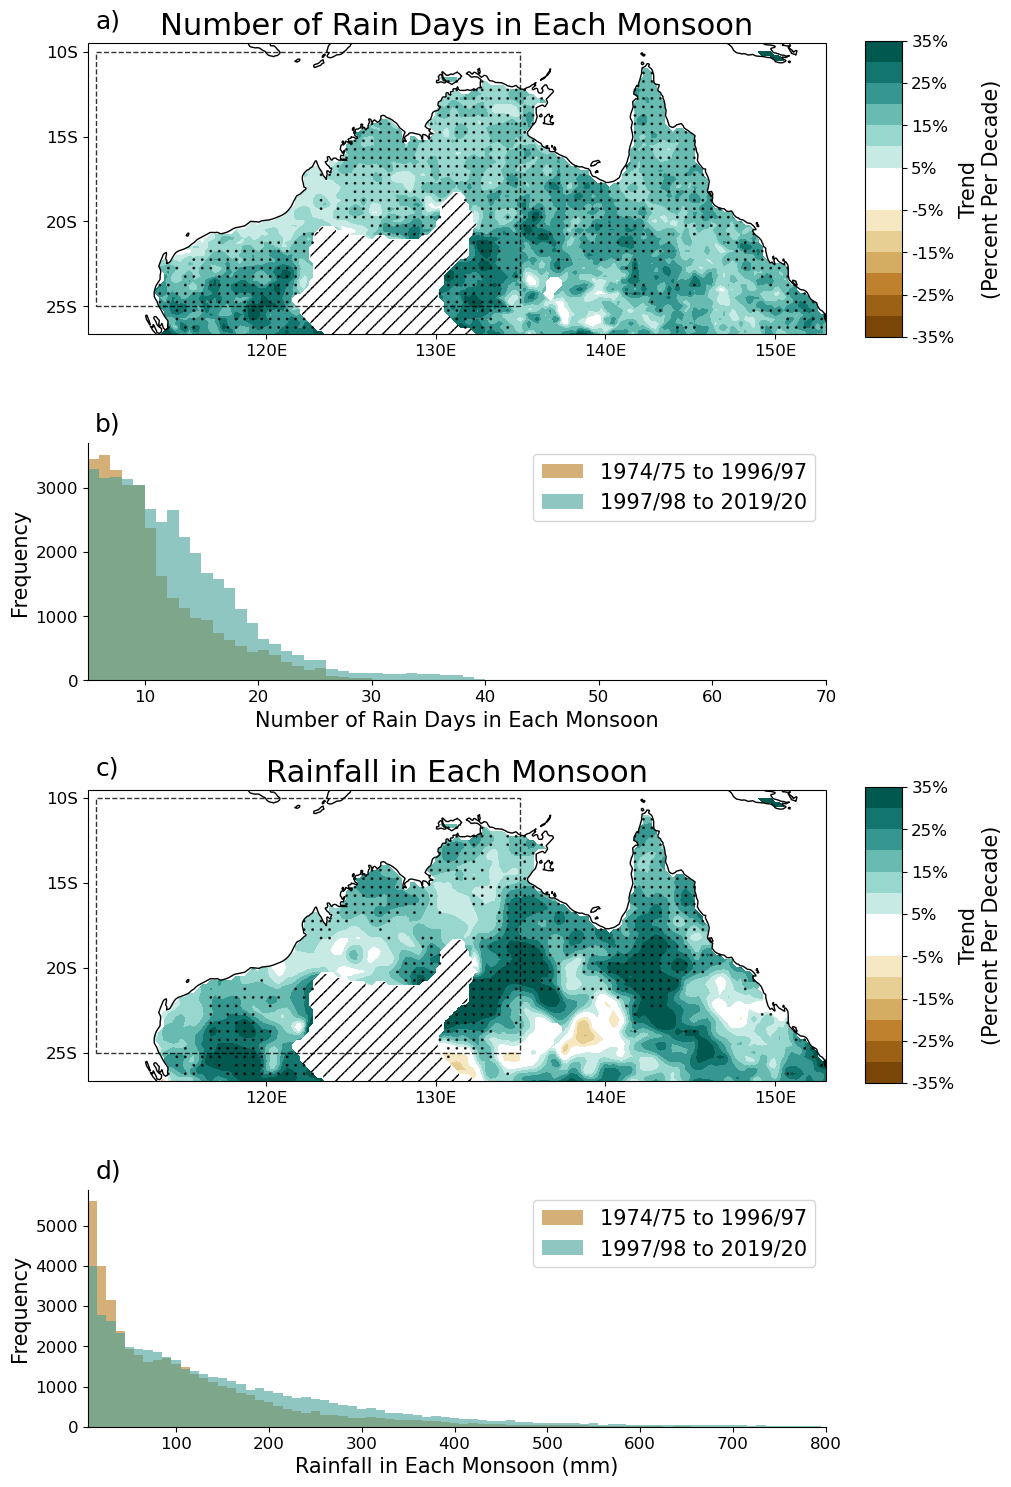

In [144]:
fig = create_map_and_distribution_plot(merged_count_sum, stip_count_sum, 
                                awap_count_sub, awap_sum_sub,
                                       title1='Number of Rain Days in Each Monsoon',
                                       title2='Rainfall in Each Monsoon',
                                      dist1_params = dist_params['rainfall_count'],
                                      dist2_params = dist_params['rainfall_sum'])

fig.savefig(
    os.path.join(constants.IMAGE_SAVE_DIR,'02_percent_trend_and_pdf_ordered_extended_longer_time.png'),
            dpi = 600 ,bbox_inches = 'tight', pad = 0)

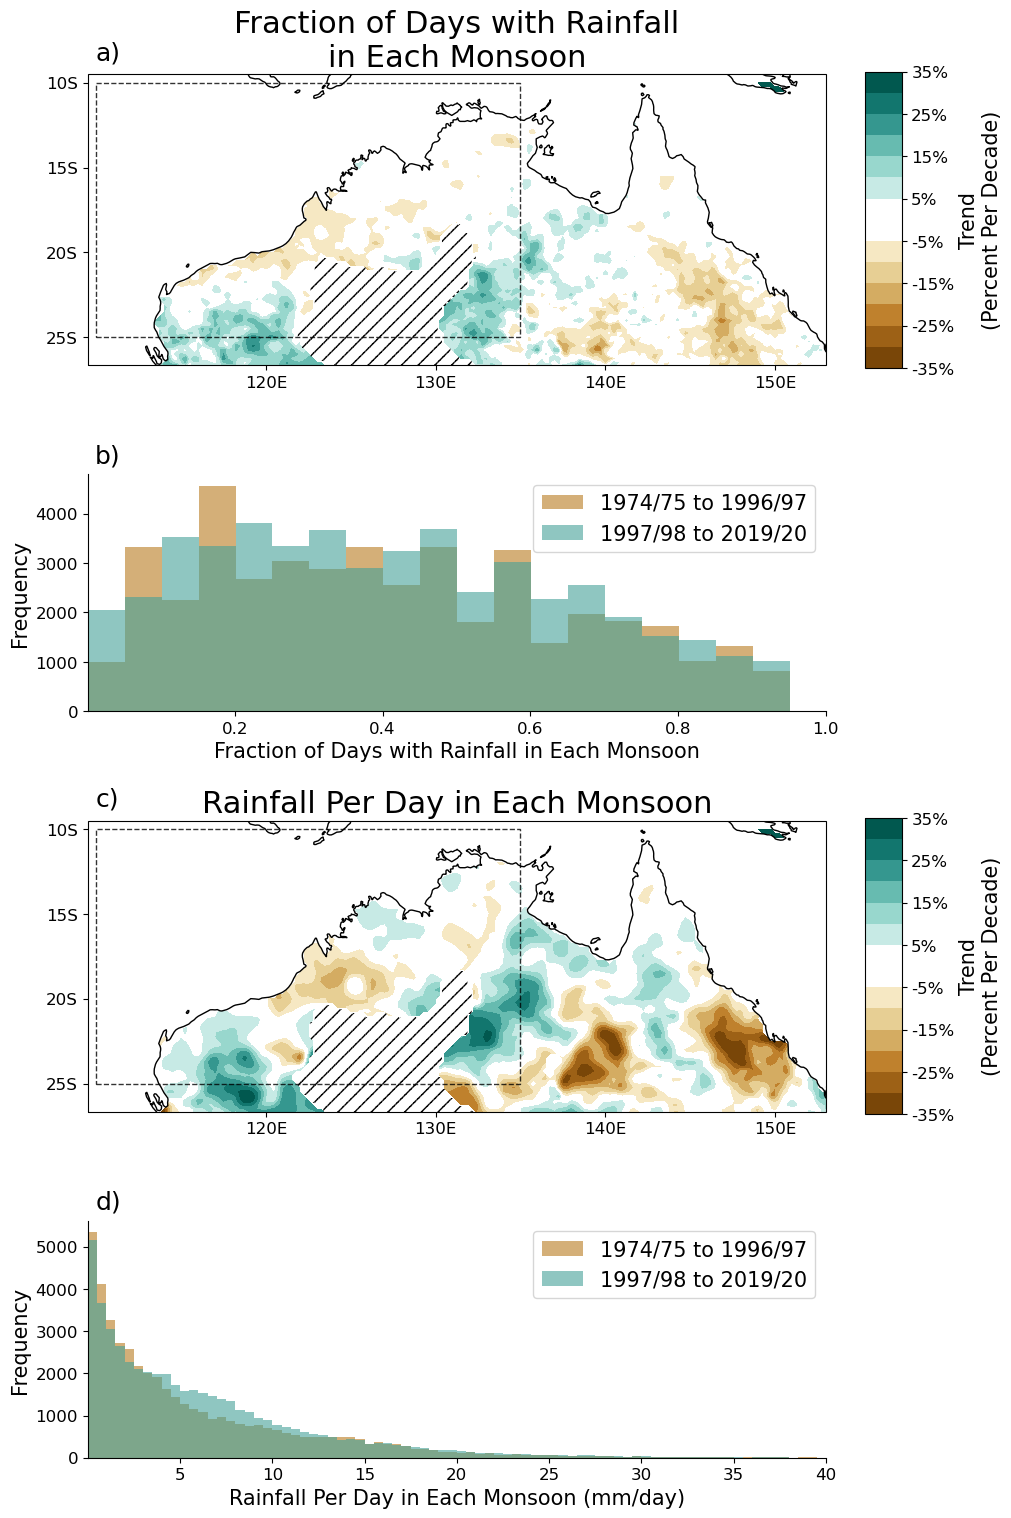

In [143]:
fig = create_map_and_distribution_plot(merged_count_sum_norm, stip_count_sum_norm, 
                                       awap_count_sub_norm, awap_sum_sub_norm, 
                                       title1='Fraction of Days with Rainfall\nin Each Monsoon',
                                       title2='Rainfall Per Day in Each Monsoon',
                                      dist1_params = dist_params['rainfall_frac'],
                                      dist2_params = dist_params['rainfall_per_day'],
)
fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR, '02_normlaised_map_and_dist_plot.png'), dpi = 600
           ,bbox_inches = 'tight', pad = 0)

# Phase Sensitivity

In [145]:
enhanced_phase_override = [4,5,6]

In [146]:
awap_sum_sub_alt  = phase_calc.resample_phase_to_subphase(awap_sum_phase, 
                                                         enhanced_phase_override=enhanced_phase_override
                                                        ).sel(phase='enhanced')

awap_count_sub_alt = phase_calc.resample_phase_to_subphase(awap_count_phase, 
                                                       enhanced_phase_override=enhanced_phase_override
                                                         ).sel(phase='enhanced')

Enhanced phase definition being used [4, 5, 6]
Enhanced phase definition being used [4, 5, 6]


In [147]:
rmm_count = phase_calc.count_in_rmm_subphase(rmm_ws, enhanced_phase_override=enhanced_phase_override)
rmm_count = calculation_functions.convert_time_to_year(rmm_count)

Enhanced phase definition being used [4, 5, 6]
Year is already the coord - no need to override


In [148]:
awap_count_sub_alt_norm = awap_count_sub_alt.precip/rmm_count.sel(phase='enhanced').number
awap_sum_sub_alt_norm = awap_sum_sub_alt.precip/rmm_count.sel(phase='enhanced').number
awap_count_sub_alt_norm

<xarray.DataArray (year: 46, lat: 80, lon: 161)>
array([[[0.        , 0.        , 0.        , ..., 0.52380952,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.57142857,
         0.61904762, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.57142857,
         0.47619048, 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.60714286,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.57142857,
         0.60714286, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.57142857,
         0.5       , 0.        ],
...
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.63461538,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.61538462,
         0.69230769, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.67307692,
         0.67307692, 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]])
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1974 1975 1976 1977 1978 ... 2015 2016 2017 2018 2019
    phase    <U8 'enhanced'

In [149]:
(trend_count_sub_alt, trend_sig_count_sub_alt,
 trend_percent_count_sub_alt, trend_percent_sig_count_sub_alt) = \
    phase_calc.return_alltrendinfo_custom(awap_count_sub_alt.precip)

(trend_sum_sub_alt, trend_sig_sum_sub_alt, trend_percent_sum_sub_alt, trend_percent_sig_sum_sub_alt) = \
    phase_calc.return_alltrendinfo_custom(awap_sum_sub_alt.precip)

(trend_count_sub_alt_norm, trend_sig_count_sub_alt_norm,
 trend_percent_count_sub_alt_norm, trend_percent_sig_count_sub_alt_norm) = \
    phase_calc.return_alltrendinfo_custom(awap_count_sub_alt_norm)

(trend_sum_sub_alt_norm, trend_sig_sum_sub_alt_norm, 
 trend_percent_sum_sub_alt_norm, trend_percent_sig_sum_sub_alt_norm) = \
    phase_calc.return_alltrendinfo_custom(awap_sum_sub_alt_norm)

In [39]:
awap_int_sub_alt = awap_sum_sub_alt/awap_count_sub_alt
awap_int_sub_alt

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, year: 46)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1974 1975 1976 1977 1978 ... 2015 2016 2017 2018 2019
    phase    <U8 'enhanced'
Data variables:
    precip   (year, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

In [40]:
trend_int_sub_alt, trend_sig_int_sub_alt, trend_percent_int_sub_alt, trend_percent_sig_int_sub_alt = \
    phase_calc.return_alltrendinfo_custom(awap_int_sub_alt.precip)

## Plotting

In [41]:
reload(pf)

<module 'plotting_functions' from '/home/563/ab2313/Documents/mjo_and_rainfall_trend/plotting_functions.py'>

In [151]:
pf.BASE_CMAP_KWARGS

{'add_white': True, 'clip_ends': 1}

max_value=3.0
levels=array([-3.  , -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  ,
       -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,
        1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ])
max_value=3.0
levels=array([-3.  , -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  ,
       -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,
        1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ])
max_value=3.0
levels=array([-3.  , -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  ,
       -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,
        1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ])
max_value=3.0
levels=array([-3.  , -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  ,
       -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,
        1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ])


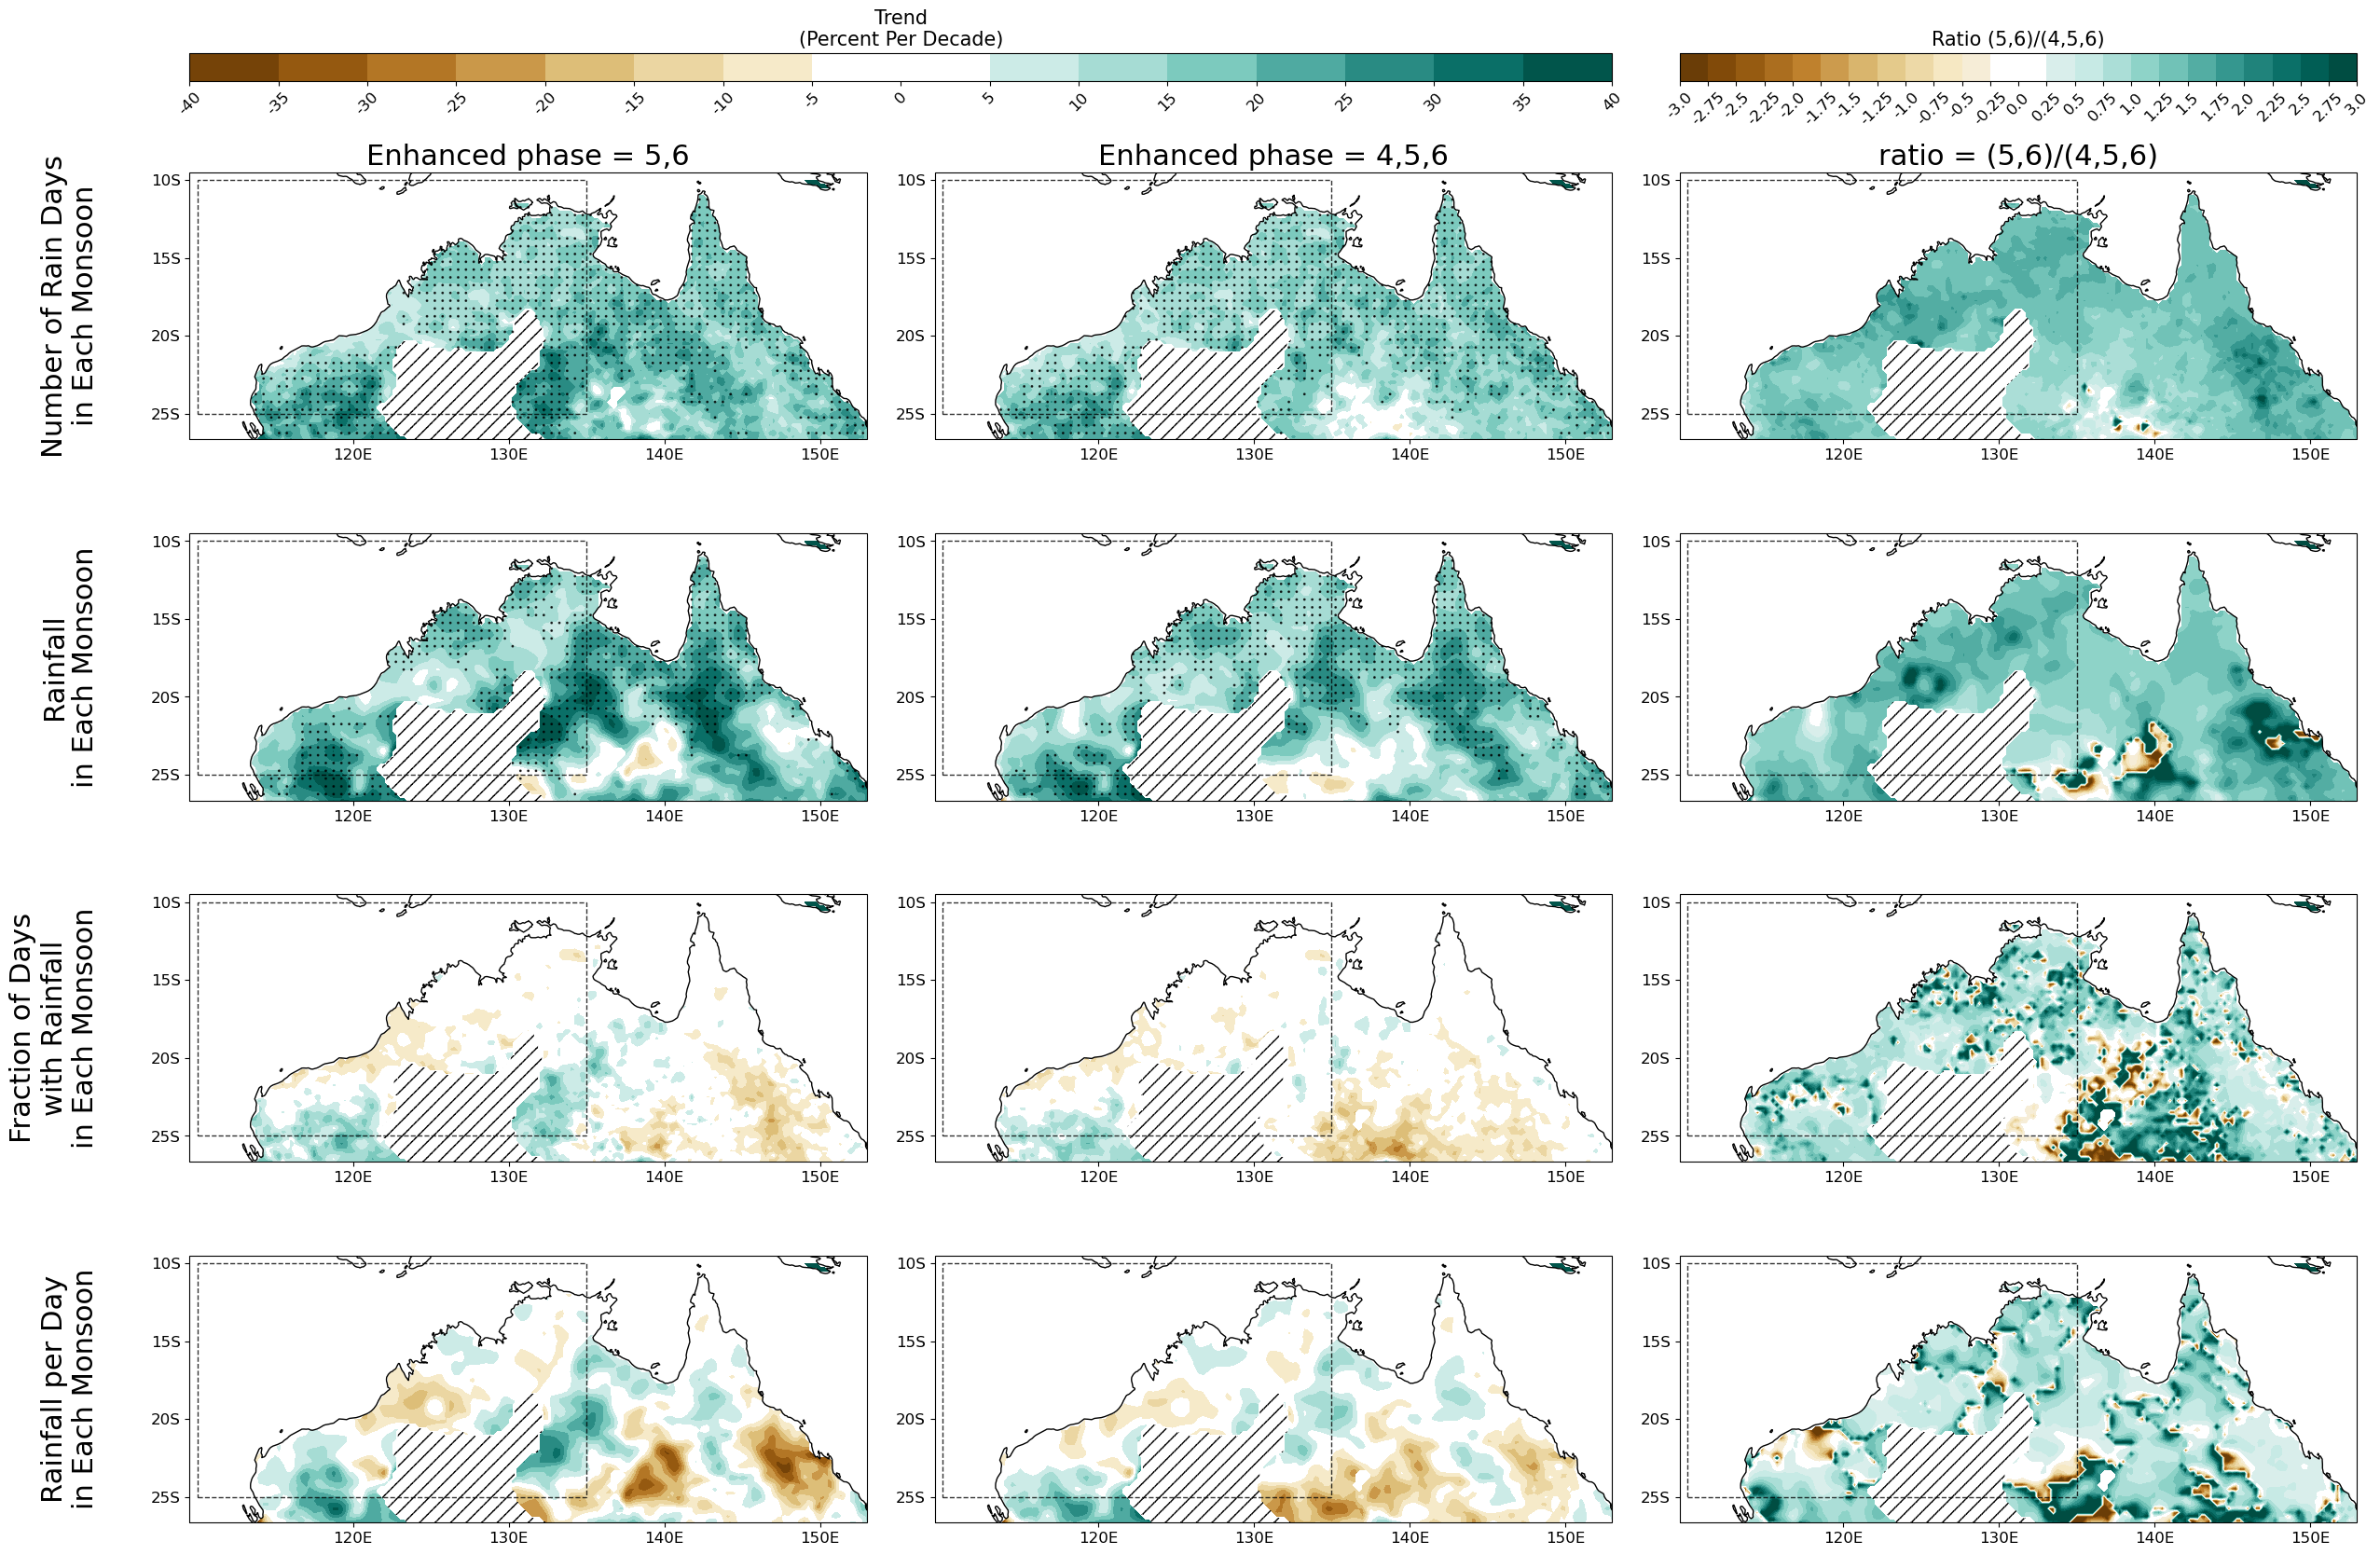

In [152]:
num_cols=4
fig, gs = pf.fig_formatter(height_ratios = [0.1] + [1] *num_cols , width_ratios = [1] * 3, hspace = 0.4, wspace = 0.1)

levels_percent = pf.create_levels(vmax=40, step=5)
cmap_percent = pf.create_discrete_cmap(cmap='BrBG', levels=levels_percent, **pf.BASE_CMAP_KWARGS)

levels_frac = pf.create_levels(vmax=3, step=.25)
cmap_frac = pf.create_discrete_cmap(cmap='BrBG', levels=levels_frac, **pf.BASE_CMAP_KWARGS)

pf.plot_fraction(fig, gs, 1,
              ds1=trend_percent_count_sub.sel(phase='enhanced'),
              ds2=trend_percent_count_sub_alt,
              ds_numerator=trend_count_sub_alt,
              ds_denominator=trend_count_sub.sel(phase='enhanced'),
              levels_percent=levels_percent, cmap_percent=cmap_percent,
              levels_frac=levels_frac, cmap_frac=cmap_frac,
              ds1_stip=trend_percent_sig_count_sub.sel(phase='enhanced'),
              ds2_stip=trend_percent_sig_count_sub_alt,
             row_label='Number of Rain Days\nin Each Monsoon',
              col_labels=['Enhanced phase = 5,6', 'Enhanced phase = 4,5,6', 'ratio = (5,6)/(4,5,6)'])


pf.plot_fraction(fig, gs, 2,
              ds1=trend_percent_sum_sub.sel(phase='enhanced'),
              ds2=trend_percent_sum_sub_alt,
              ds_numerator=trend_sum_sub_alt,
              ds_denominator=trend_sum_sub.sel(phase='enhanced'),
              levels_percent=levels_percent, cmap_percent=cmap_percent,
              levels_frac=levels_frac, cmap_frac=cmap_frac,
              ds1_stip=trend_percent_sig_sum_sub.sel(phase='enhanced'),
              ds2_stip=trend_percent_sig_sum_sub_alt,
             row_label='Rainfall\nin Each Monsoon')

pf.plot_fraction(fig, gs, 3,
              ds1=trend_percent_count_sub_norm.sel(phase='enhanced'),
              ds2=trend_percent_count_sub_alt_norm,
              ds_numerator=trend_count_sub_alt_norm,
              ds_denominator=trend_count_sub_norm.sel(phase='enhanced'),
              levels_percent=levels_percent, cmap_percent=cmap_percent,
              levels_frac=levels_frac, cmap_frac=cmap_frac,
              ds1_stip=trend_percent_sig_count_sub_norm.sel(phase='enhanced'),
              ds2_stip=trend_percent_sig_count_sub_alt_norm,
              row_label='Fraction of Days\nwith Rainfall\nin Each Monsoon'
             )

c_percent, c_frac = pf.plot_fraction(fig, gs, 4,
              ds1=trend_percent_sum_sub_norm.sel(phase='enhanced'),
              ds2=trend_percent_sum_sub_alt_norm,
              ds_numerator=trend_sum_sub_alt_norm,
              ds_denominator=trend_sum_sub_norm.sel(phase='enhanced'),
              levels_percent=levels_percent, cmap_percent=cmap_percent,
              levels_frac=levels_frac, cmap_frac=cmap_frac,
              ds1_stip=trend_percent_sig_sum_sub_norm.sel(phase='enhanced'),
              ds2_stip=trend_percent_sig_sum_sub_alt_norm,
                row_label='Rainfall per Day\nin Each Monsoon'
                                 )
cax1 = plt.subplot(gs[0,0:2])
pf.create_colorbar(c_percent, cax1, levels_percent, ticks=levels_percent, 
                   cbar_title= "Trend\n(Percent Per Decade)", orientation='horizontal')

cax2 = plt.subplot(gs[0,2])
pf.create_colorbar(c_frac, cax2, levels_frac, round_level=2, cbar_title="Ratio (5,6)/(4,5,6)", 
                   orientation='horizontal')

fig.savefig(
    os.path.join(constants.IMAGE_SAVE_DIR, '02_enhanced_phase_definition_sensitivity_test.png'),
           dpi=800, bbox_inches='tight')

# Fraction  of Total Trend

This code compares the fraction of the trend in the enhanced phase to the trend overall to get an estimate of the total trend.

## Total Trend Calc

In [43]:
years = np.unique(awap.time.dt.year.values)
years

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

From this we can see that there has been 47 years. However, the 2020 year is just the end of a wet season (or 1974 is just the start of a wet seaosn). So this is only 46 wet seasons.

In [44]:

# Moving the start of the wet season to the next year so the yearly resampling works.
# This means that 1975 is 1974/1975 and 2020 is 2019/2020
awap_ws = phase_calc.wet_season_year(awap)
rmm_ws = phase_calc.wet_season_year(rmm)

# Splitting AWAP into the the different phases of the Wheeler and Hendon MJO
awap_split_ws = phase_calc.split_into_1to8(awap_ws, rmm_ws)

In [45]:
print(len(np.unique(awap_split_ws.time.dt.year.values)[:23]), 
len(np.unique(awap_split_ws.time.dt.year.values)[23:]))

23 23


In [46]:
def count_resample(awap_data):
    # countring the rainfall events in each Wheeler and Hendon Phase
    awap_count = awap_data.resample(time = 'y').count(dim = 'time')
    awap_count['time'] = awap_count.time.dt.year
    awap_count = awap_count.rename({'time':'year', 'precip':'number'}) # to match the rmm count
    return awap_count

def sum_resample(awap_data):
    # sumring the rainfall events in each Wheeler and Hendon Phase
    awap_sum = awap_data.resample(time = 'y').sum(dim = 'time')
    awap_sum['time'] = awap_sum.time.dt.year
    awap_sum = awap_sum.rename({'time':'year', 'precip':'number'}) # to match the rmm sum
    return awap_sum

In [47]:
# The number of raindays each wet season.
awap_count = count_resample(awap_ws)

# The total amount of rainfall each wet season.
awap_sum = sum_resample(awap_ws)

In [48]:
# This is the raw trend, the data has not been normalised
phase_calc = reload(phase_calc)
trend_count, trend_sig_count, trend_percent_count, trend_percent_sig_count = \
    phase_calc.return_alltrendinfo_custom(awap_count.number)

# This is the raw trend, the data has not been normalised
phase_calc = reload(phase_calc)
trend_sum, trend_sig_sum, trend_percent_sum, trend_percent_sig_sum = \
    phase_calc.return_alltrendinfo_custom(awap_sum.number)

## Percent of Trend due to MJO Calc

In [49]:
# The percent of the overall trend that is explained by the enhanced phase trend.
frac_count_exp = trend_count_sub.sel(phase = 'enhanced').squeeze() * 100/trend_count
frac_sum_exp = trend_sum_sub.sel(phase = 'enhanced').squeeze() * 100/trend_sum

In [50]:
frac_sum_exp

<xarray.DataArray (lat: 80, lon: 161)>
array([[   -0.        ,    -0.        ,    -0.        , ...,
         1452.3082883 ,     0.        ,     0.        ],
       [   -0.        ,    -0.        ,    -0.        , ...,
        -2757.94551111,   506.58252215,    -0.        ],
       [   -0.        ,    -0.        ,    -0.        , ...,
         -197.13885392,  -186.50204383,    -0.        ],
       ...,
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
    phase    <U8 'enhanced'

plotting_functions.colorbar_creater funciton is deprecated.Please use plotting_functions.create_discrete_cmap instead.


Text(0.01, 1.05, 'b)')

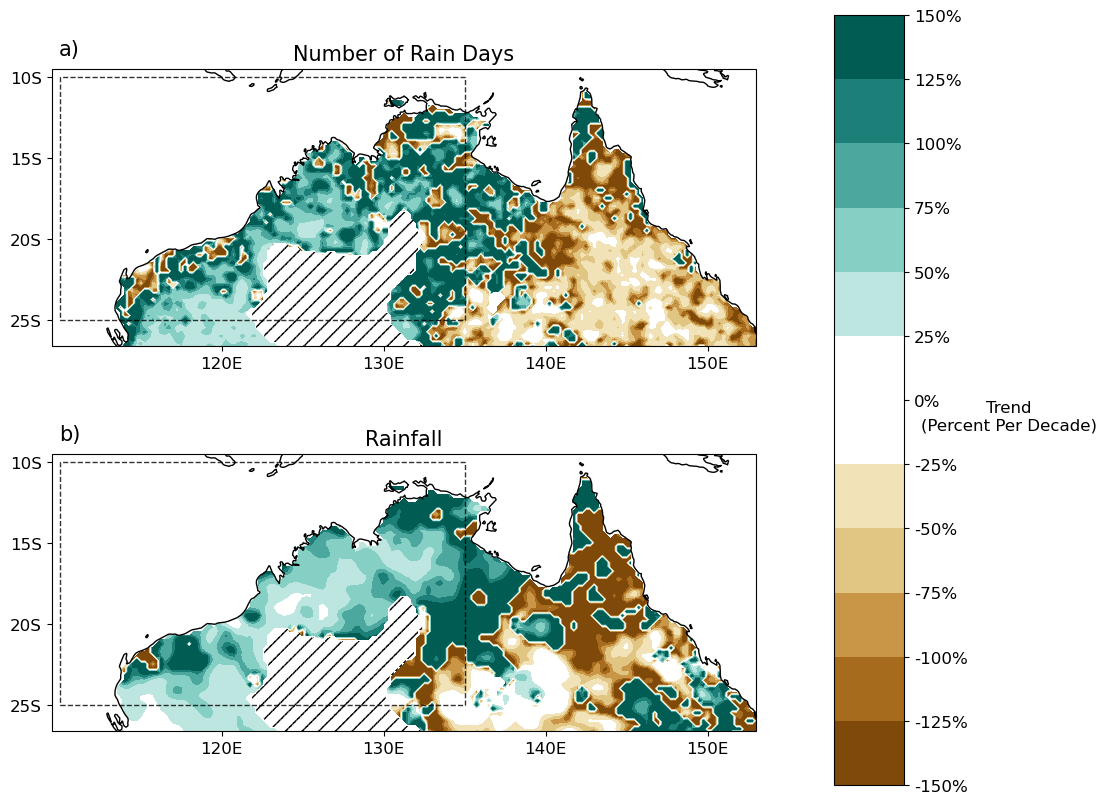

In [51]:
fig, gs = pf.fig_formatter(height_ratios = [1,1], width_ratios = [1, 0.1], hspace = 0.0, wspace = 0.2)


vmax = 150
vmin = -vmax
step = 25
cmapi = 'BrBG'
# cmapi = 'Blues'


cmap, levels = pf.colorbar_creater(vmax, step, cmap = cmapi,vmin = vmin, add_white = 1,extender = 1)

ax = fig.add_subplot(gs[0,0], projection = ccrs.PlateCarree())
plot = pf.nwa_map_plot(frac_count_exp, ax, cmap, levels)
ax.set_title('Number of Rain Days', size = 15);
ax.annotate('a)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


cax = plt.subplot(gs[:,1])
ticks = np.core.defchararray.add(levels.astype(str)  , np.tile('%',len(levels)))
pf.create_colorbar(plot, cax, levels, 
                   ticks = ticks,
                   cbar_title =  "Trend\n(Percent Per Decade)",
                  cbar_titleSize = 12, orientation = 'vertical', rotation = 0)



ax = fig.add_subplot(gs[1,0], projection = ccrs.PlateCarree())
plot = pf.nwa_map_plot(frac_sum_exp,  ax, cmap, levels)

ax.set_title('Rainfall', size = 15);
ax.annotate('b)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


# fig.savefig('../images/mjo_and_rainfall_trend_images/percent_contribution_BrBG_extended.png', dpi = 600
#            ,bbox_inches = 'tight', pad = 0)